Import all required packages

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cPickle as pickle
import scipy.special
import ghalton
import numpy as np
import time
import os
import sys
sys.path.insert(1,'/Users/zyzdiana/GitHub/AC297r-Volume-Registration/code')
from utils import clean

In [148]:
from utils import clean,to_radian,hann
from rotation_2d import rot_cost_func
from visualize import plot_cost_func
from cost_functions import cf_ssd
from get_data import get_data_all,get_data

Load the data saved as a dictionary

In [4]:
# load data
data_dict = pickle.load(open('data_dict.p','rb'))

In [124]:
dict_10mm, dict_8mm, dict_6_4mm = get_data_all()
list_6_4mm, list_8mm, list_10mm = get_data()

## Bessel Interpolation

Try putting a smooth mask on an image.

In [5]:
from mask import circle_mask
from Bessel_Interp import bessel_rotate,bessel_cost_func

4.5 4.6 4.7 4.8 4.9 5.0 5.1 5.2 4.5 4.6 4.7 4.8 4.9 5.0 5.1 5.2 4.5 4.6 4.7 4.8 4.9 5.0 5.1 5.2

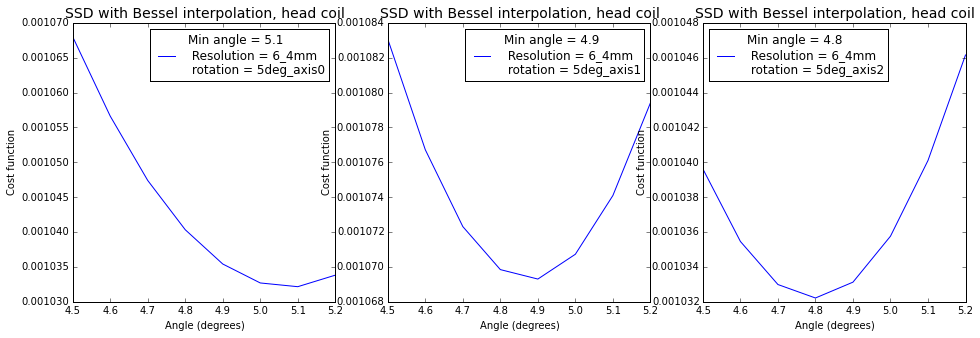

In [141]:
# Last Data Set with 3 resolutions and one rotation
# 6.4mm Resolution
thetas = np.arange(4.5,5.2,0.1)
plt.figure(figsize=[16,5])
# rotation along axis 0
cost_64_0 = bessel_cost_func(list_6_4mm[0], list_6_4mm[3], thetas, axis=0, mask=True)
plt.subplot(1,3,1)
plot_cost_func(thetas, cost_64_0, '6_4mm', 'Bessel','5deg_axis0', 'head')

# rotation along axis 1
cost_64_1 = bessel_cost_func(list_6_4mm[0], list_6_4mm[1], thetas, axis=1, mask=True)
plt.subplot(1,3,2)
plot_cost_func(thetas, cost_64_1, '6_4mm', 'Bessel','5deg_axis1', 'head')

# rotation along axis 2
cost_64_2 = bessel_cost_func(list_6_4mm[0], list_6_4mm[2], thetas, axis=2, mask=True)
plt.subplot(1,3,3)
plot_cost_func(thetas, cost_64_2, '6_4mm', 'Bessel','5deg_axis2', 'head')
plt.show()

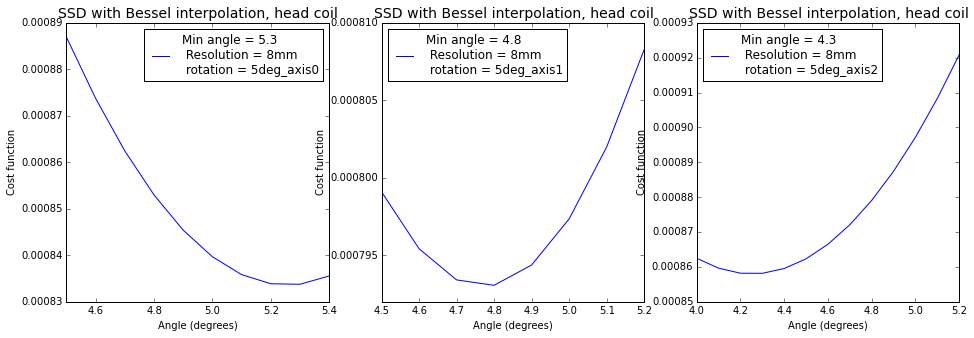

In [138]:
# Last Data Set with 3 resolutions and one rotation
# 8mm Resolution
thetas = np.arange(4.5,5.5,0.1)
plt.figure(figsize=[16,5])
# rotation along axis 0
cost_8_0 = bessel_cost_func(list_8mm[0], list_8mm[3], thetas, axis=0, mask=True)
plt.subplot(1,3,1)
plot_cost_func(thetas, cost_8_0, '8mm', 'Bessel','5deg_axis0', 'head')

# rotation along axis 1
cost_8_1 = bessel_cost_func(list_8mm[0], list_8mm[1], thetas, axis=1, mask=True)
plt.subplot(1,3,2)
thetas = np.arange(4.5,5.2,0.1)
plot_cost_func(thetas, cost_8_1, '8mm', 'Bessel','5deg_axis1', 'head')

# rotation along axis 2
thetas = np.arange(4.0,5.2,0.1)
cost_8_2 = bessel_cost_func(list_8mm[0], list_8mm[2], thetas, axis=2, mask=True)
plt.subplot(1,3,3)
plot_cost_func(thetas, cost_8_2, '8mm', 'Bessel','5deg_axis2', 'head')
plt.show()

4.5 4.6 4.7 4.8 4.9 5.0 5.1 5.2 5.3 5.4

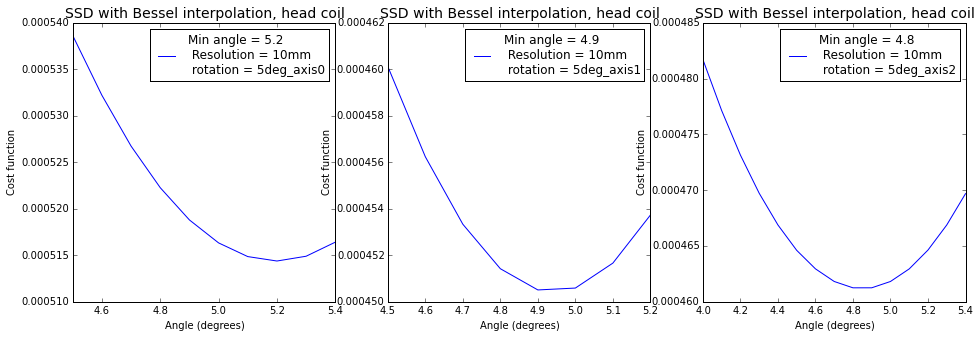

In [140]:
# Last Data Set with 3 resolutions and one rotation
# 10mm Resolution
thetas = np.arange(4.5,5.5,0.1)
plt.figure(figsize=[16,5])
# rotation along axis 0
cost_10_0 = bessel_cost_func(list_10mm[0], list_10mm[3], thetas, axis=0, mask=True)
plt.subplot(1,3,1)
plot_cost_func(thetas, cost_10_0, '10mm', 'Bessel','5deg_axis0', 'head')

# rotation along axis 1
thetas = np.arange(4.5,5.3,0.1)
#cost_10_1 = bessel_cost_func(list_10mm[0], list_10mm[1], thetas, axis=1, mask=True)
plt.subplot(1,3,2)
plot_cost_func(thetas, cost_10_1, '10mm', 'Bessel','5deg_axis1', 'head')

# rotation along axis 2
thetas = np.arange(4.0,5.4,0.1)
#cost_10_2 = bessel_cost_func(list_10mm[0], list_10mm[2], thetas, axis=2, mask=True)
plt.subplot(1,3,3)
plot_cost_func(thetas, cost_10_2, '10mm', 'Bessel','5deg_axis2', 'head')
plt.show()

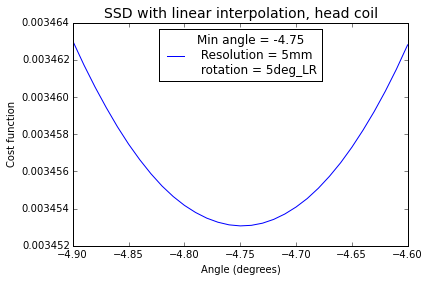

In [185]:
thetas = np.arange(-4.9,-4.6,0.01)
cost = rot_cost_func(head_iso_5mm,head_5deg_LR_5mm,thetas, 0,'bilinear',mask=True,smooth=True)
plot_cost_func(thetas, cost, '5mm', 'linear','5deg_LR', 'head')

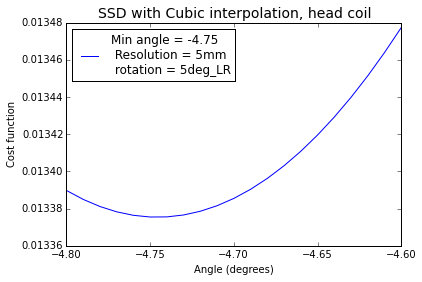

In [165]:
thetas = np.arange(-4.8,-4.6,0.01)
cost = rot_cost_func(head_iso_5mm,head_5deg_LR_5mm,thetas, 0,'bicubic')
plot_cost_func(thetas, cost, '5mm', 'Cubic','5deg_LR', 'head')

First, I chose two sample volumes with 5mm resolution in both head and body coil to test with.

In [97]:
# get some test data
# head coil
head_iso_5mm = data_dict['5mm']['head']['iso'][0]
head_5deg_LR_5mm = data_dict['5mm']['head']['LR']['5deg'][0]
head_5deg_AP_5mm = data_dict['5mm']['head']['AP']['5deg'][0]
# body coil
body_iso_5mm = data_dict['5mm']['body']['iso'][0]
body_5deg_LR_5mm = data_dict['5mm']['body']['LR']['5deg'][0]
body_5deg_AP_5mm = data_dict['5mm']['body']['AP']['5deg'][0]

4.5 4.6 4.7 4.8 4.9 5.0 5.1 5.2


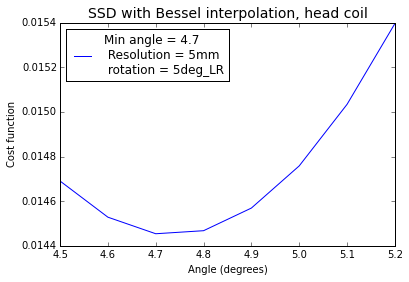

In [100]:
# head coil Bessel interpolation on regular grid with unsmoothed mask
thetas = np.arange(4.5,5.2,0.1)
cost_5deg_LR = bessel_cost_func(head_iso_5mm, head_5deg_LR_5mm, thetas, axis=0, mask=True)
plot_cost_func(thetas, cost_5deg_LR, '5mm', 'Bessel','5deg_LR', 'head')

4.5 4.6 4.7 4.8 4.9 5.0 5.1 5.2


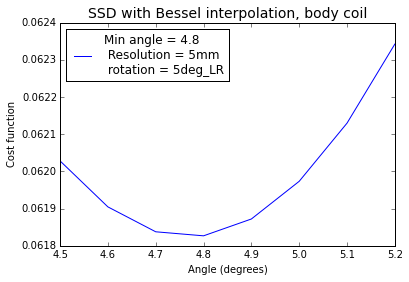

In [101]:
# body coil Bessel interpolation on regular grid with unsmoothed mask
thetas = np.arange(4.5,5.3,0.1)
cost_5deg_LR = bessel_cost_func(body_iso_5mm, body_5deg_LR_5mm, thetas, axis=0, mask = True)
plot_cost_func(thetas, cost_5deg_LR, '5mm', 'Bessel','5deg_LR', 'body')

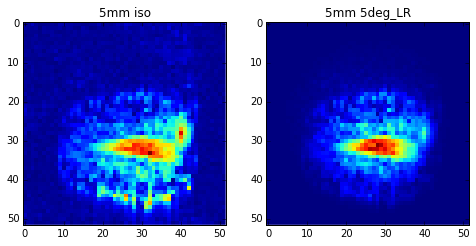

In [99]:
# Visualize the smoothed circular mask on pineapple
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
plt.imshow(head_iso_5mm[25,:,:], interpolation= 'None')
plt.title('5mm iso')
plt.subplot(1,2,2)
plt.imshow(circle_mask(head_iso_5mm[25,:,:],smooth=True), interpolation= 'None')
plt.title('5mm 5deg_LR')
plt.show()

4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.0 5.1


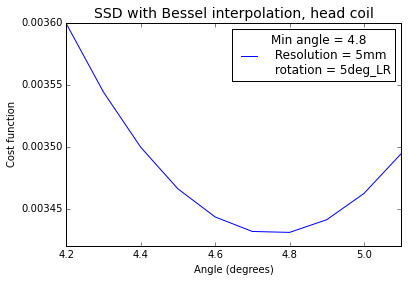

In [102]:
# head coil Bessel interpolation on regular grid with smoothed mask
thetas = np.arange(4.2,5.2,0.1)
cost_5deg_LR = bessel_cost_func(head_iso_5mm, head_5deg_LR_5mm, thetas, axis=0, mask = True, smooth = True)
plot_cost_func(thetas, cost_5deg_LR, '5mm', 'Bessel','5deg_LR', 'head')

4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.0 5.1


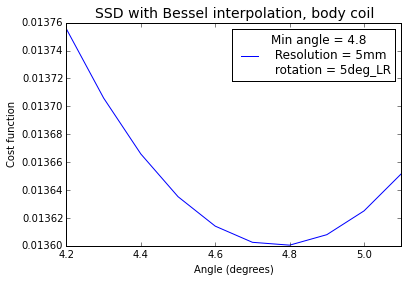

In [103]:
# body coil Bessel interpolation on regular grid with smoothed mask
thetas = np.arange(4.2,5.2,0.1)
cost_5deg_LR = bessel_cost_func(body_iso_5mm, body_5deg_LR_5mm, thetas, axis=0, mask = True, smooth = True)
plot_cost_func(thetas, cost_5deg_LR, '5mm', 'Bessel','5deg_LR', 'body')

In [107]:
# Bessel Interpolation with Halton Sampling using unsmoothed mask

def bessel_rotate_halton(image, theta, x1, y1):
    Ib = []
    theta = to_radian(theta)
    s = (image.shape[0]-1)/2.
    
    rM = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    x = []
    for i in np.arange(-s,s+1):
        for j in np.arange(-s,s+1):
            x.append(np.dot(rM, np.array([i,j])))
    x = np.array(x)
    for idx in xrange(len(x1)):
        R = np.sqrt((x[:,1]-x1[idx])**2 + (x[:,0]-y1[idx])**2)
        mask_R = (R == 0)
        Bess = np.zeros(R.shape)
        Bess[~mask_R] = scipy.special.j1(np.pi*R[~mask_R])*hann(R[~mask_R],image.shape[0])/(np.pi*R[~mask_R])
        #Bess[~mask_R] = scipy.special.j1(np.pi*R[~mask_R])/(np.pi*R[~mask_R])
        Bess[mask_R] = 0.5
        Bess = Bess/np.sum(Bess)
        tmp = image.ravel()*Bess
        Ib.append(np.sum(tmp)*np.pi/2)
    return np.array(Ib)

def bessel_halton_cost_func_circle(vol1, vol2, N, thetas, axis, smooth = True, mode = 1):
    '''
    vol1: original image
    vol2: volume to be rotated
    thetas: list of degress to try
    cf: cost function
    arg: string for plot titles
    '''
    cost_func = np.zeros([len(thetas),])
    # generate Halton sample points
    s = (len(vol1)-1)/2.
    sequencer = ghalton.GeneralizedHalton(ghalton.EA_PERMS[:3])
    sequencer.reset()
    points = sequencer.get(N)
    pts = np.array(points)
    xx1 = (len(vol1)-1) * pts[:,0] - s
    yy1 = (len(vol1)-1) * pts[:,1] - s
    mask = np.sqrt(xx1**2+yy1**2) < s*0.7
    x1 = xx1[mask]
    y1 = yy1[mask]
    new_vol1 = np.zeros([len(vol1),len(x1)])
    print len(x1),
    for i in xrange(len(vol1)):
        if(axis == 0):
            sub1 = circle_mask(vol1[i,:,:], smooth = True, mode = 1)
        elif(axis == 1):
            sub1 = circle_mask(vol1[:,i,:], smooth = True, mode = 1)
        else:
            sub1 = circle_mask(vol1[:,:,i], smooth = True, mode = 1)
        rot = bessel_rotate_halton(sub1, 0, x1, y1)
        new_vol1[i] = rot
    for idx, t in enumerate(thetas):
        print t, 
        new_vol2 = np.empty([len(vol2),len(x1)])
        for i in xrange(len(vol2)):
            if(axis==0):
                sub2 = circle_mask(vol2[i,:,:], smooth = True, mode = 1)
            elif(axis==1):
                sub2 = circle_mask(vol2[:,i,:], smooth = True, mode = 1)
            else:
                sub2 = circle_mask(vol2[:,:,i], smooth = True, mode = 1)
            rot = bessel_rotate_halton(sub2, t, x1, y1)
            new_vol2[i] = rot
        cost_func[idx] = cf_ssd(new_vol2,new_vol1)
    return cost_func

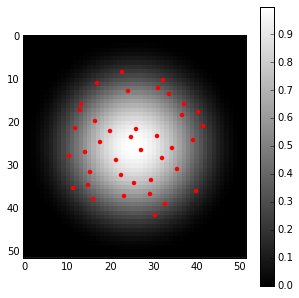

In [106]:
N = 100
sequencer = ghalton.GeneralizedHalton(ghalton.EA_PERMS[:3])
sequencer.reset()
points = sequencer.get(N)
pts = np.array(points)
s = (len(head_iso_5mm)-1)/2.
x1 = (len(head_iso_5mm)-1) * pts[:,0]
y1 = (len(head_iso_5mm)-1) * pts[:,1]

mask = np.sqrt((x1-s)**2+(y1-s)**2) < s*0.7
plt.figure(figsize=[5,5])
plt.scatter(x1[mask],y1[mask],c='r',lw=0)
plt.imshow(im_mask,interpolation='None',cmap='gray')
plt.colorbar()
plt.show()

39 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

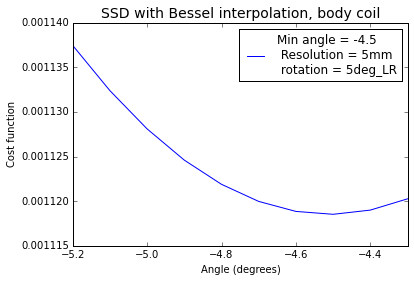

 22 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

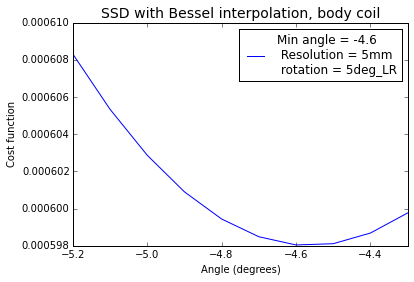

 17 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

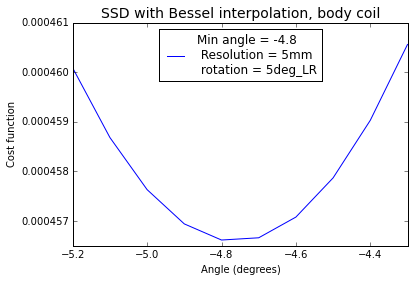

 14 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

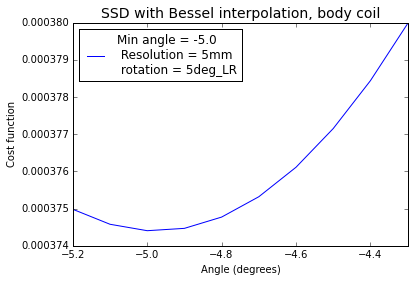

 8 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

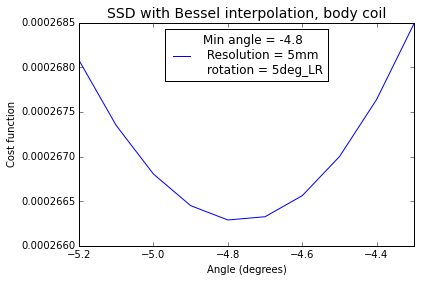

 4 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

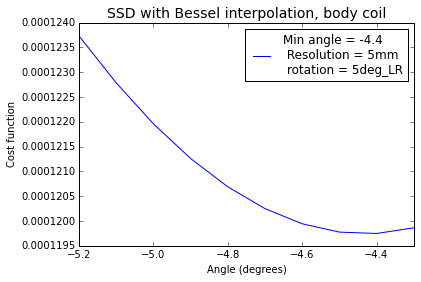

In [117]:
# Bessel Interpolation with Halton Sampling, smoothed mask, body coil
thetas = np.arange(-5.2,-4.3,0.1)
N_ls = [100,50,40,30,20,10]
res = '5mm'
coil = 'body'
rot = 'LR'
deg = '5deg'
for N in N_ls:
    halton_cost_5deg_LR = bessel_halton_cost_func_circle(data_dict[res][coil]['iso'][0],
                                                         data_dict[res][coil][rot][deg][0], 
                                                         N, thetas, axis=0)
    plot_cost_func(thetas, halton_cost_5deg_LR, res, 'Bessel',deg+'_'+rot, coil)
    plt.show()

39 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

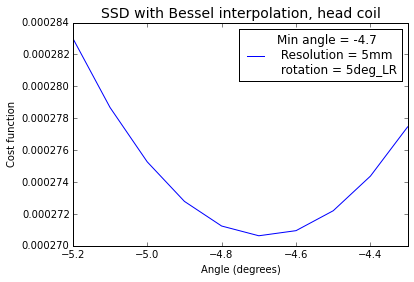

 22 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

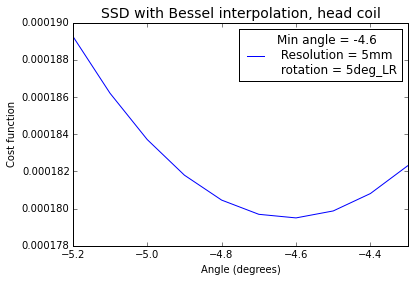

 17 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

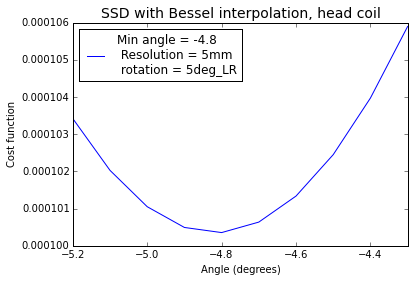

 14 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

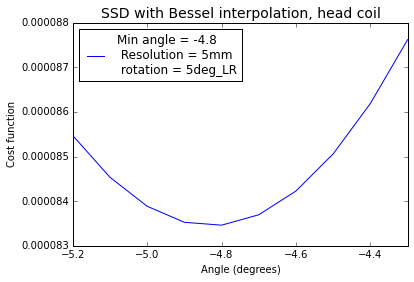

 8 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

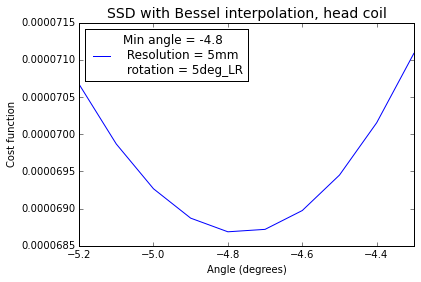

 4 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

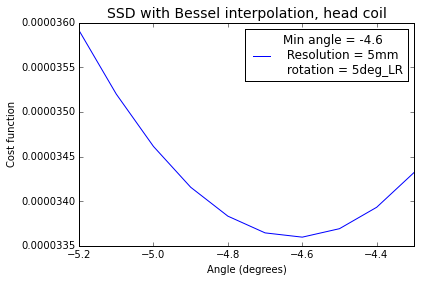

In [110]:
# Bessel Interpolation with Halton Sampling, smoothed mask, head coil
thetas = np.arange(-5.2,-4.3,0.1)
N_ls = [100,50,40,30,20,10]
res = '5mm'
coil = 'head'
rot = 'LR'
deg = '5deg'
for N in N_ls:
    halton_cost_5deg_LR = bessel_halton_cost_func_circle(data_dict[res][coil]['iso'][0],
                                                         data_dict[res][coil][rot][deg][0], N, thetas, axis=0)
    plot_cost_func(thetas, halton_cost_5deg_LR, res, 'Bessel',deg+'_'+rot, coil)
    plt.show()

39 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

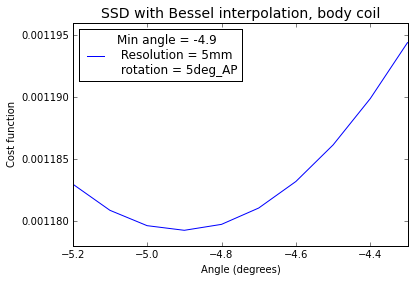

 22 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

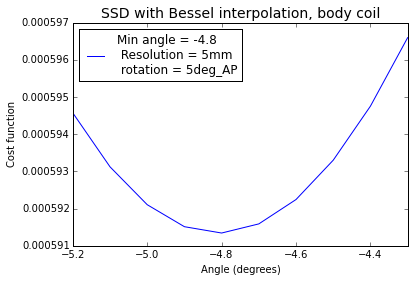

 17 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

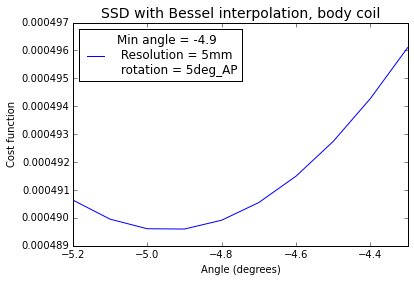

 14 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

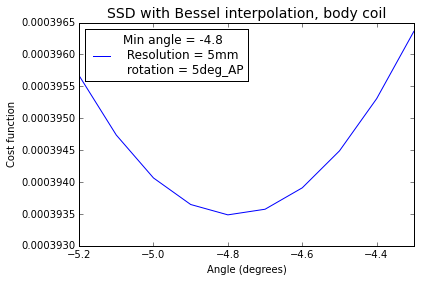

 8 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

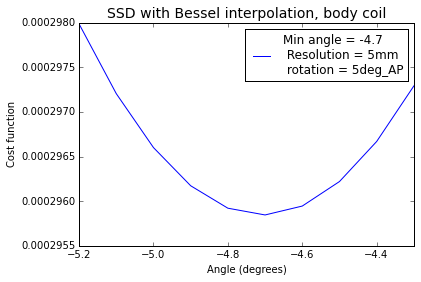

 4 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3

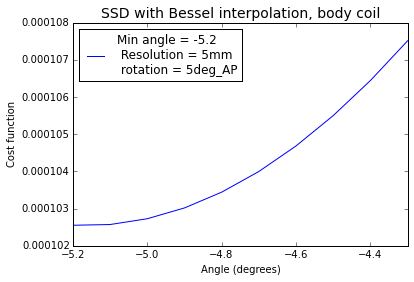

In [114]:
# Bessel Interpolation with Halton Sampling, smoothed mask, body coil
thetas = np.arange(-5.2,-4.3,0.1)
N_ls = [100,50,40,30,20,10]
res = '5mm'
coil = 'body'
rot = 'AP'
deg = '5deg'
for N in N_ls:
    halton_cost_5deg_LR = bessel_halton_cost_func_circle(data_dict[res][coil]['iso'][0],
                                                         data_dict[res][coil][rot][deg][0], 
                                                         N, thetas, axis=1)
    plot_cost_func(thetas, halton_cost_5deg_LR, res, 'Bessel',deg+'_'+rot, coil)
    plt.show()

14 -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 14 -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1

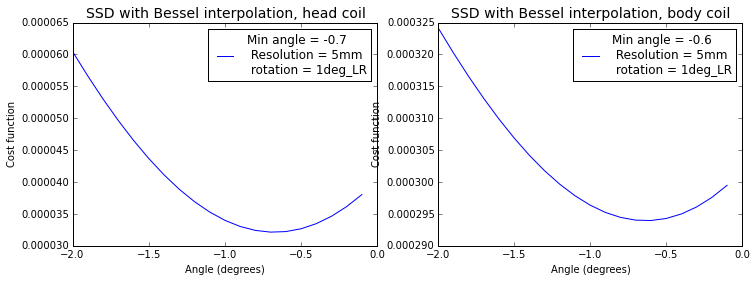

 14 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 14 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1

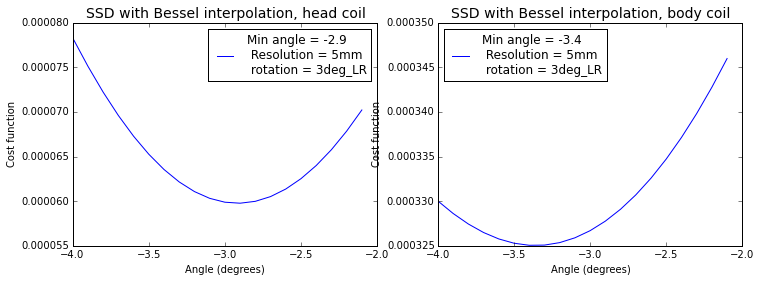

 14 -6.0 -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 14 -6.0 -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1

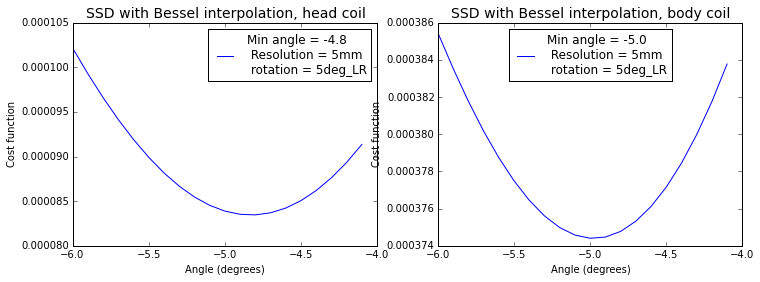

 14 -8.0 -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.0 -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1 14 -8.0 -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.0 -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1

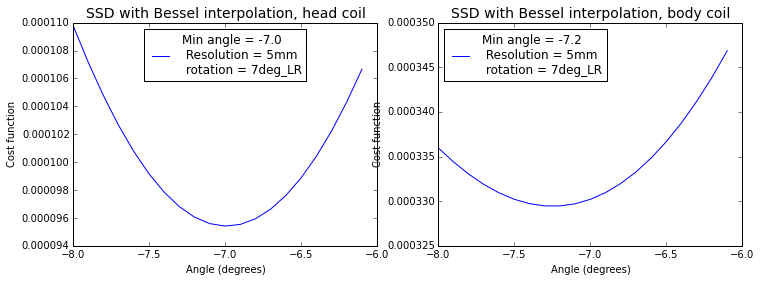

 14 -10.0 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 -9.0 -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1 14 -10.0 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 -9.0 -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1

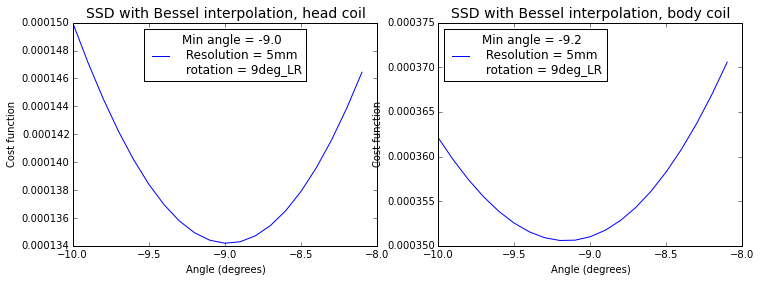

 14 -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 14 -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1

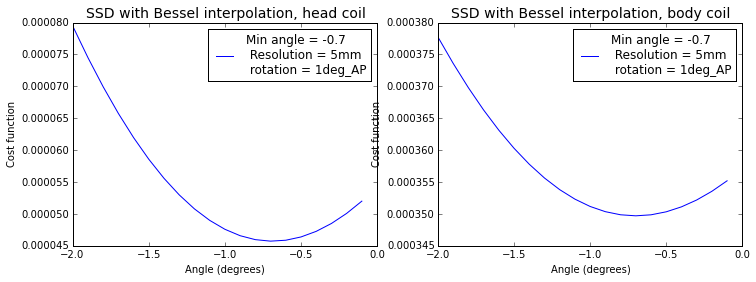

 14 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 14 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1

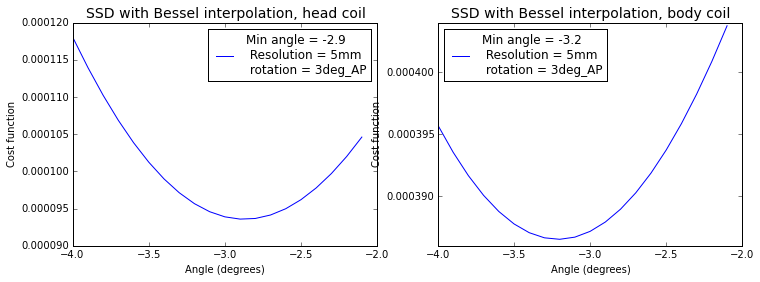

 14 -6.0 -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 14 -6.0 -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1

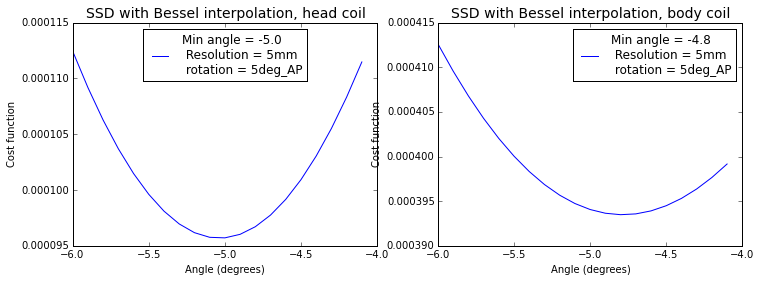

 14 -8.0 -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.0 -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1 14 -8.0 -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.0 -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1

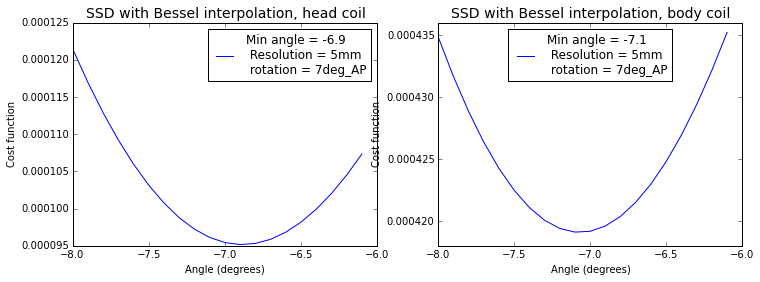

 14 -10.0 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 -9.0 -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1 14 -10.0 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 -9.0 -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1

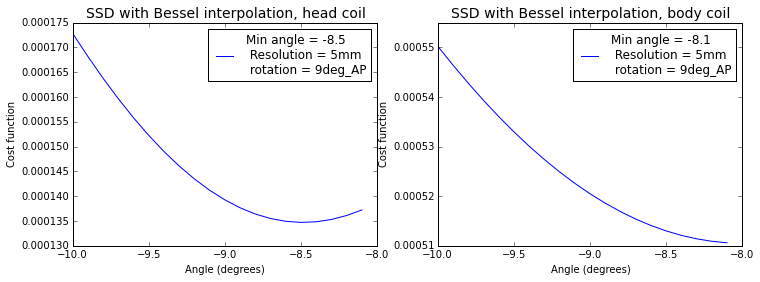

 14 -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 14 -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1

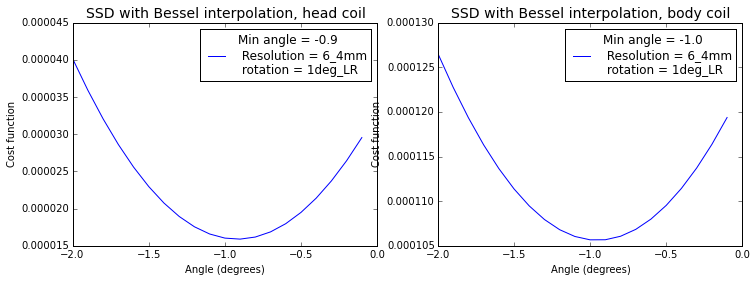

 14 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 14 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1

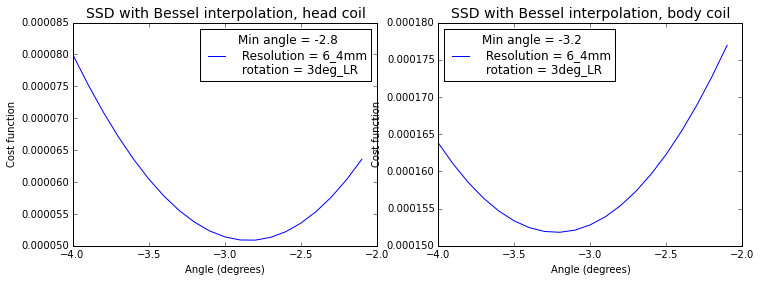

 14 -6.0 -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 14 -6.0 -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1

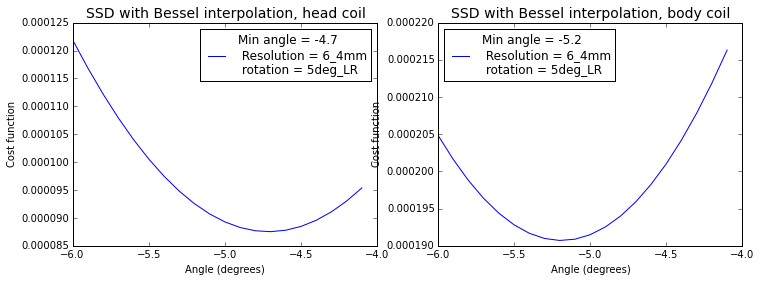

 14 -8.0 -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.0 -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1 14 -8.0 -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.0 -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1

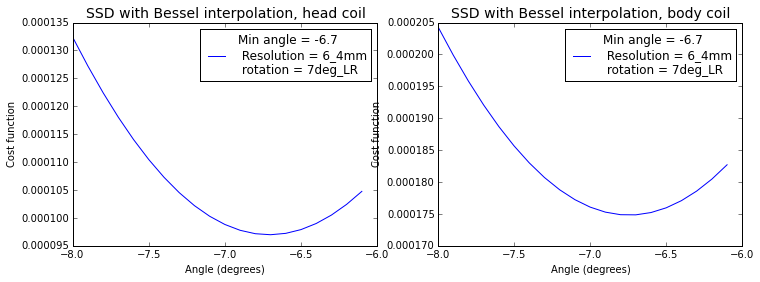

 14 -10.0 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 -9.0 -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1 14 -10.0 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 -9.0 -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1

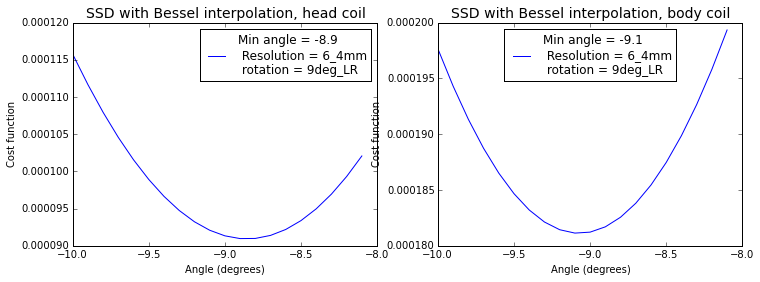

 14 -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 14 -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1

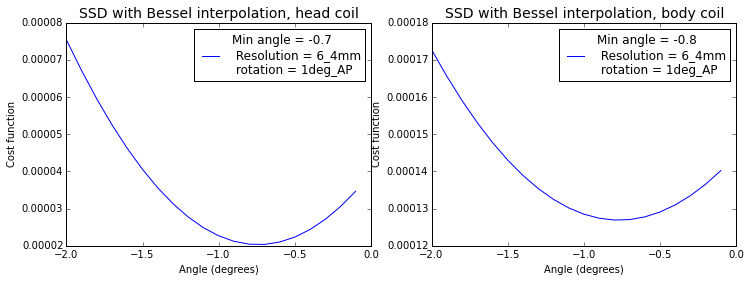

 14 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 14 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1

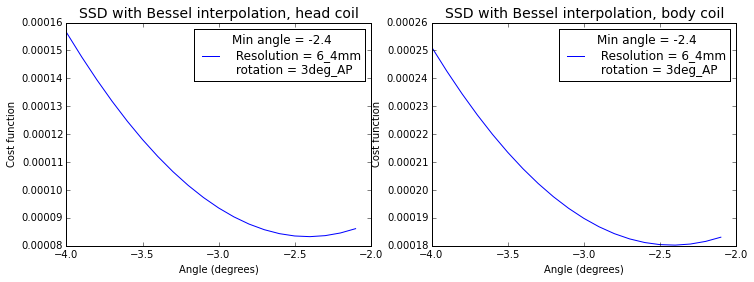

 14 -6.0 -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 14 -6.0 -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1

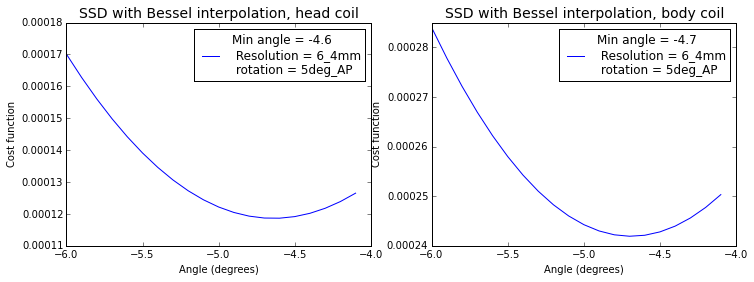

 14 -8.0 -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.0 -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1 14 -8.0 -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.0 -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1

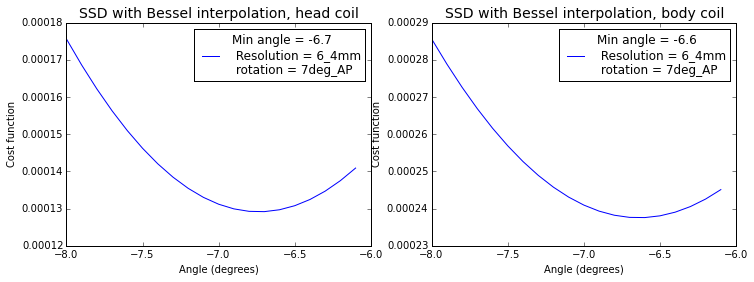

 14 -10.0 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 -9.0 -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1 14 -10.0 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 -9.0 -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1

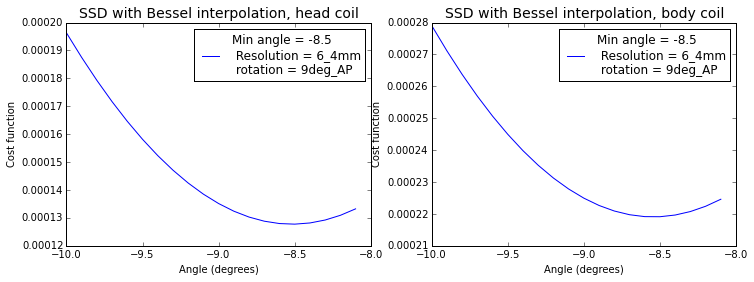

 14 -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 14 -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1

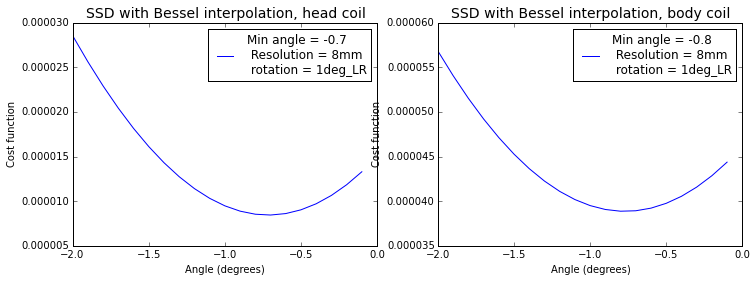

 14 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 14 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1

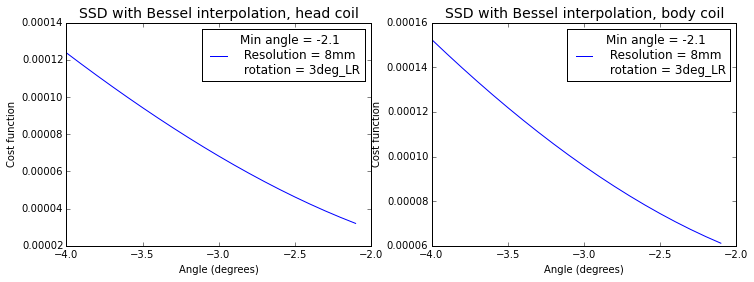

 14 -6.0 -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 14 -6.0 -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1

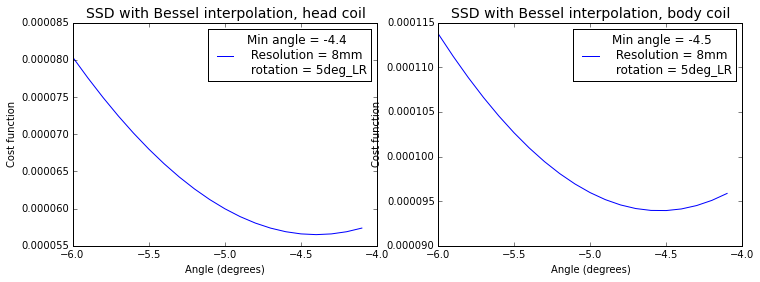

 14 -8.0 -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.0 -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1 14 -8.0 -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.0 -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1

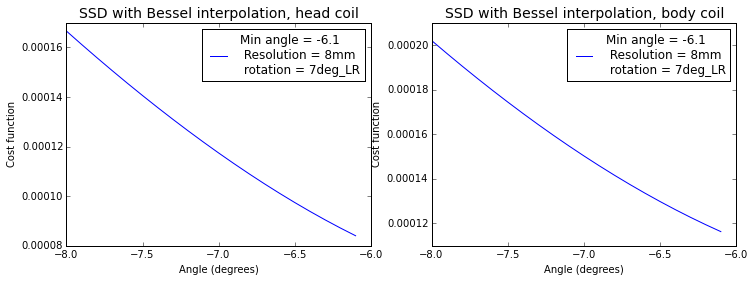

 14 -10.0 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 -9.0 -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1 14 -10.0 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 -9.0 -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1

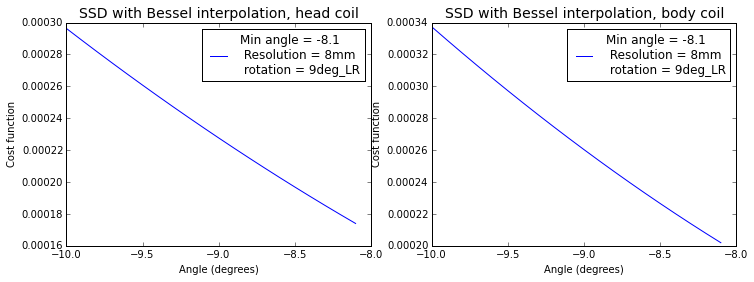

 14 -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 14 -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1

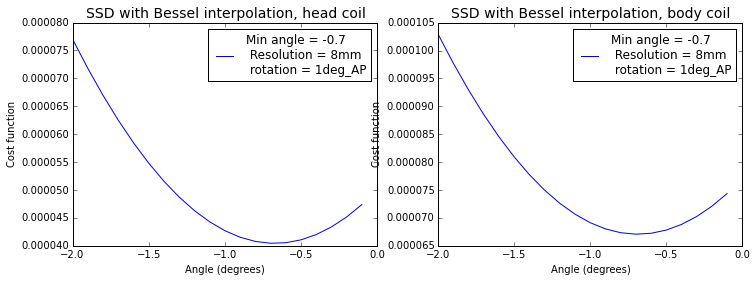

 14 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 14 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1

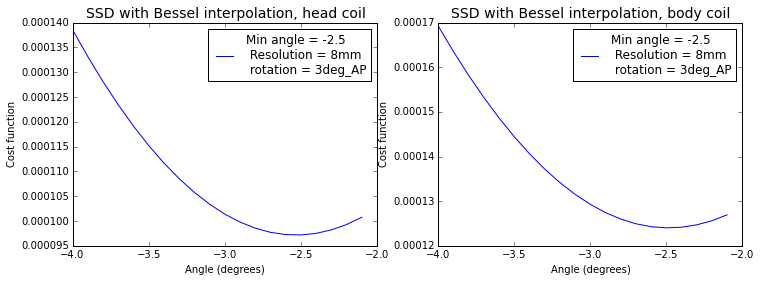

 14 -6.0 -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 14 -6.0 -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1

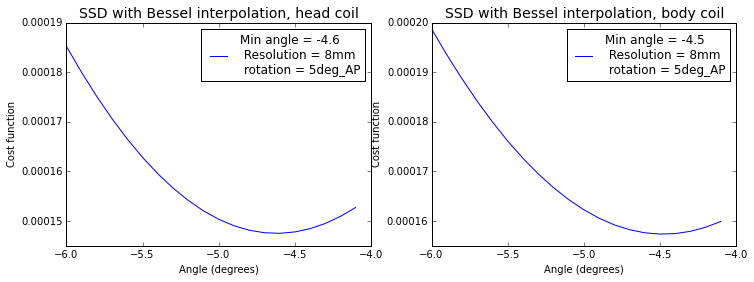

 14 -8.0 -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.0 -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1 14 -8.0 -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.0 -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1

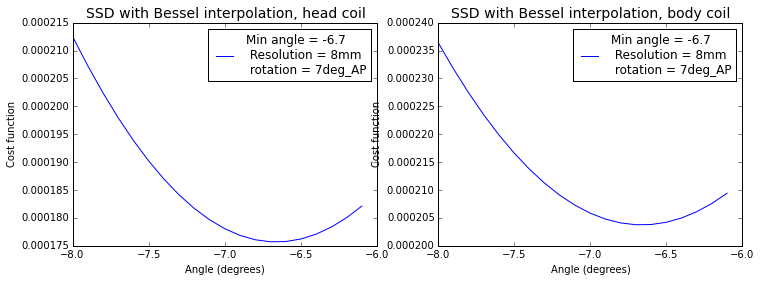

 14 -10.0 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 -9.0 -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1 14 -10.0 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 -9.0 -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1

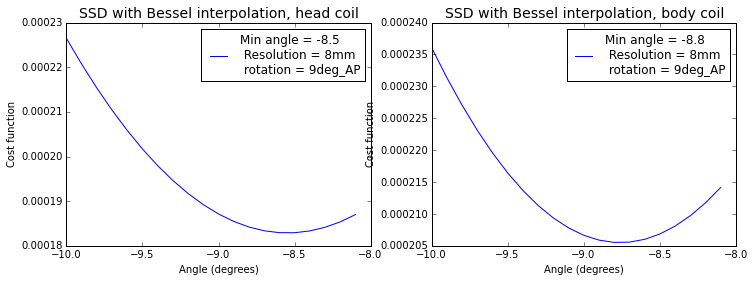

 14 -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 14 -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1

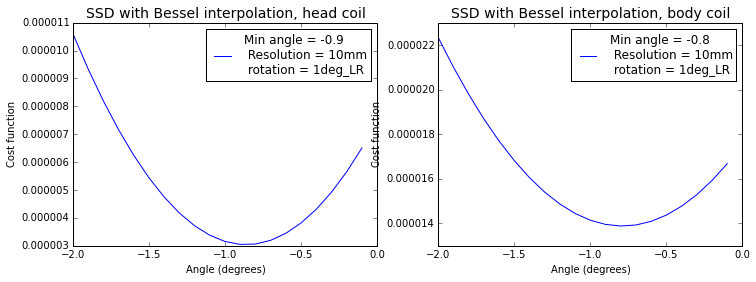

 14 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 14 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1

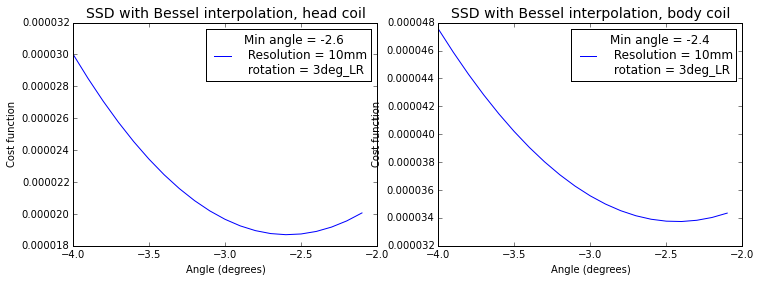

 14 -6.0 -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 14 -6.0 -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1

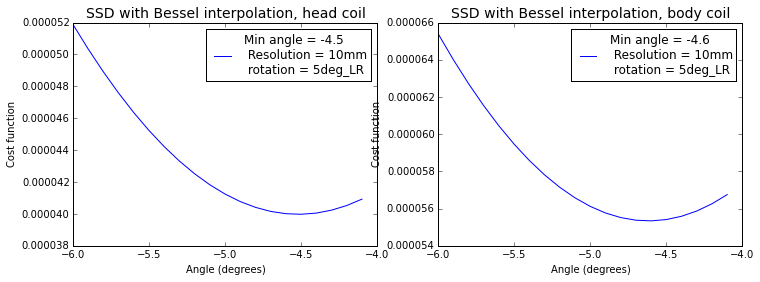

 14 -8.0 -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.0 -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1 14 -8.0 -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.0 -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1

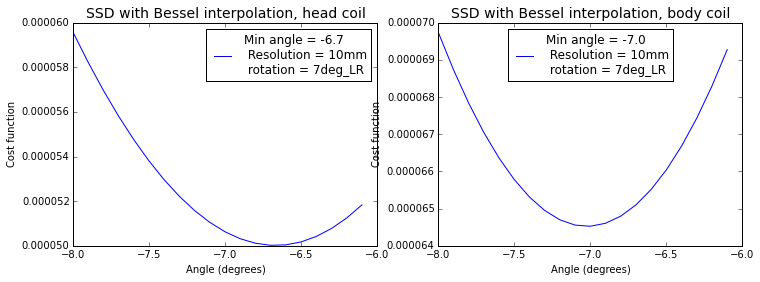

 14 -10.0 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 -9.0 -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1 14 -10.0 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 -9.0 -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1

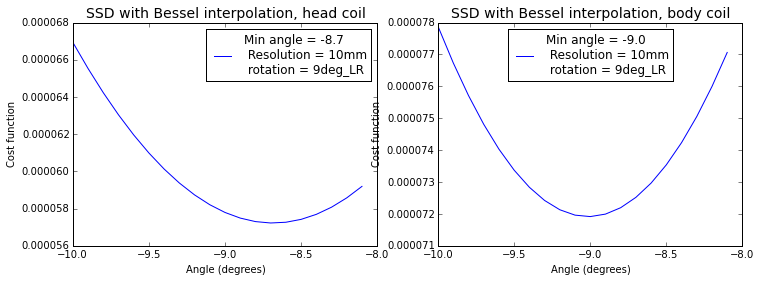

 14 -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 14 -2.0 -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1

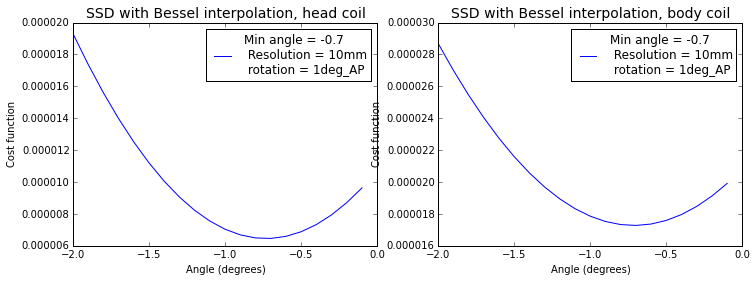

 14 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 14 -4.0 -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1

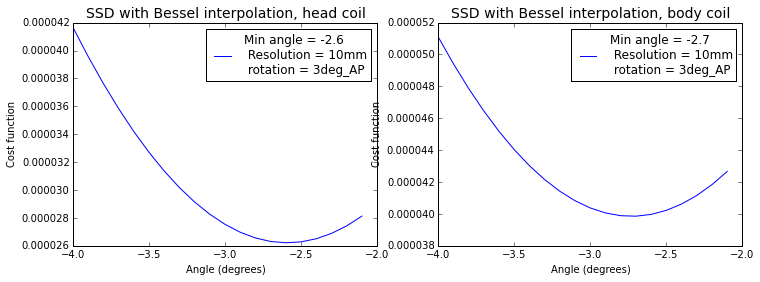

 14 -6.0 -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 14 -6.0 -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1

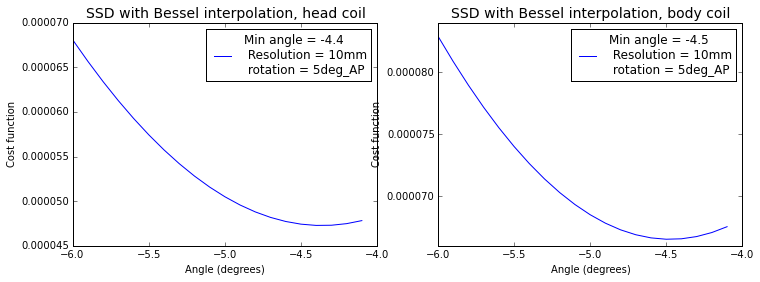

 14 -8.0 -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.0 -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1 14 -8.0 -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.0 -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1

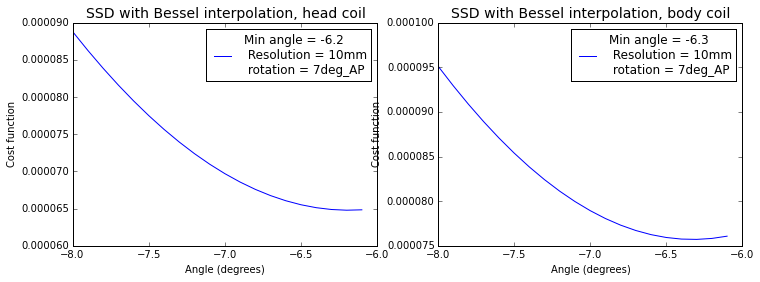

 14 -10.0 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 -9.0 -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1 14 -10.0 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 -9.0 -8.9 -8.8 -8.7 -8.6 -8.5 -8.4 -8.3 -8.2 -8.1

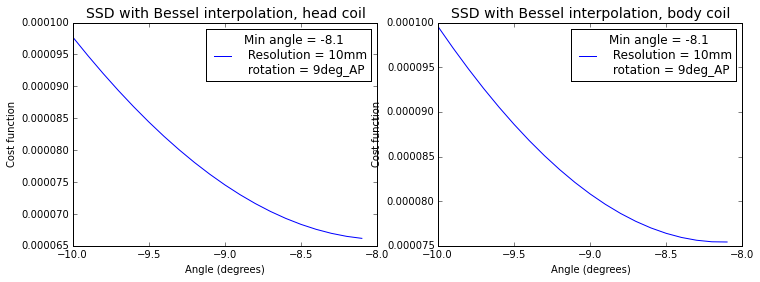

In [122]:
# Resuts with 30 Halton Samples
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    for rot in rot_axes:
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        for deg in degrees:
            plt.figure(figsize=[12,4])
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-1,-d+1,0.1)
                cost = bessel_halton_cost_func_circle(data_dict[res][coil]['iso'][0],
                                                         data_dict[res][coil][rot][deg][0], 
                                                         30, thetas, axis=ax)
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, cost, res, 'Bessel', deg+'_'+rot, coil)
            plt.show()

## Linear Interpolation

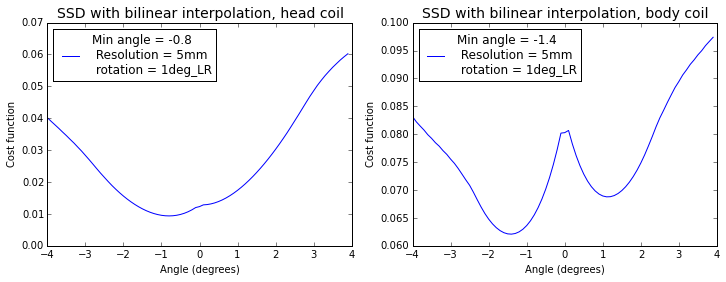

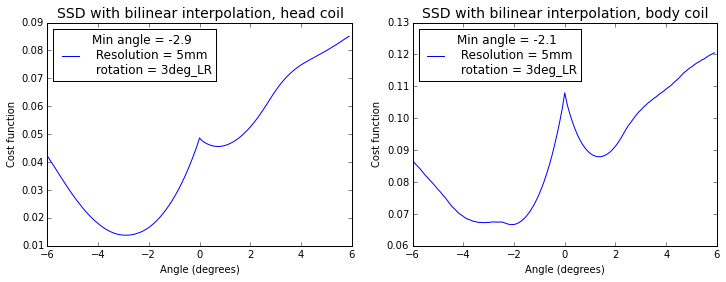

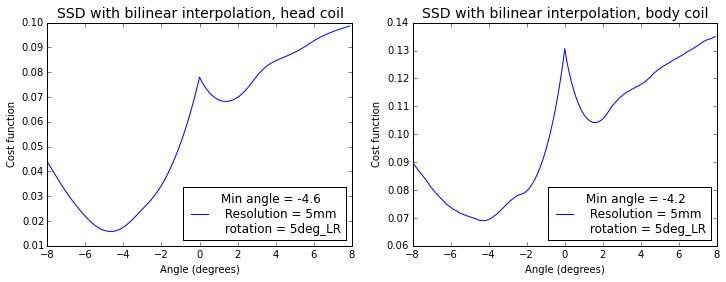

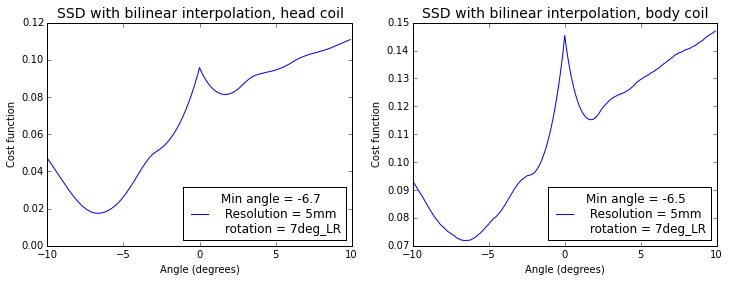

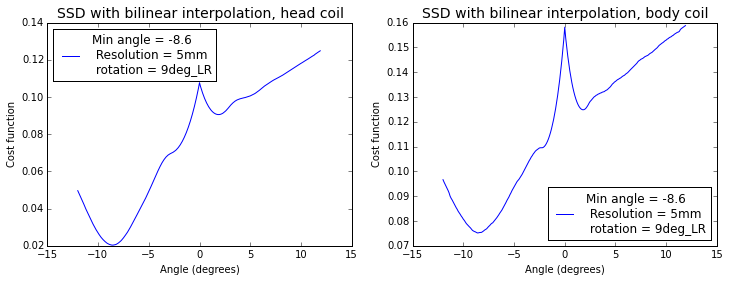

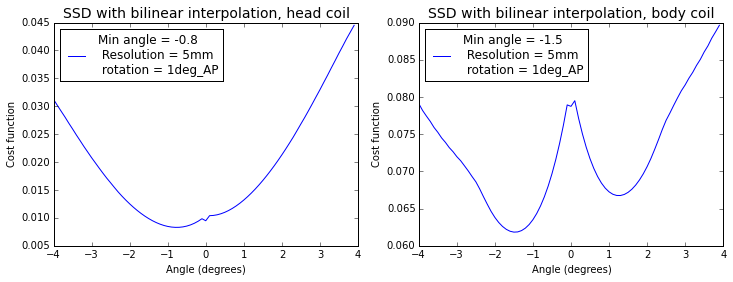

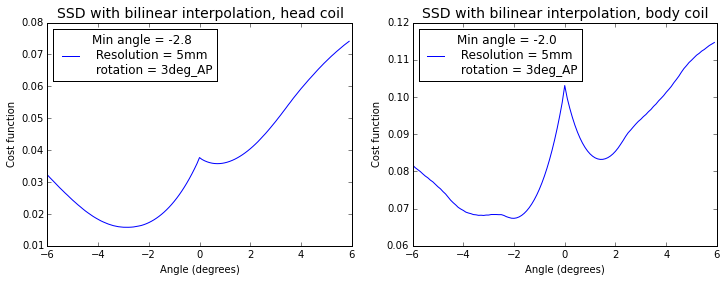

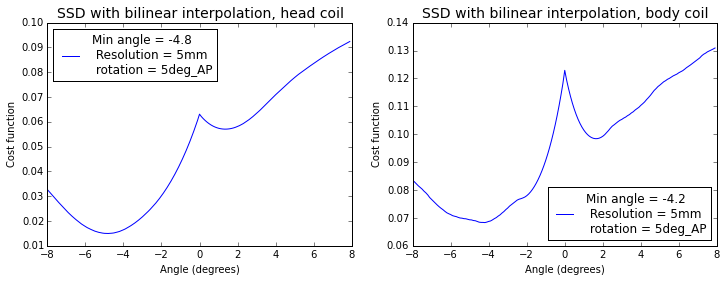

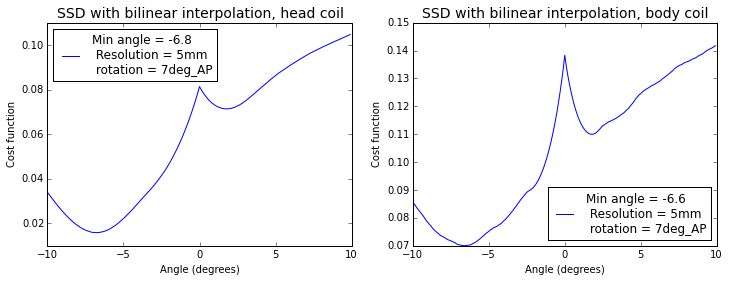

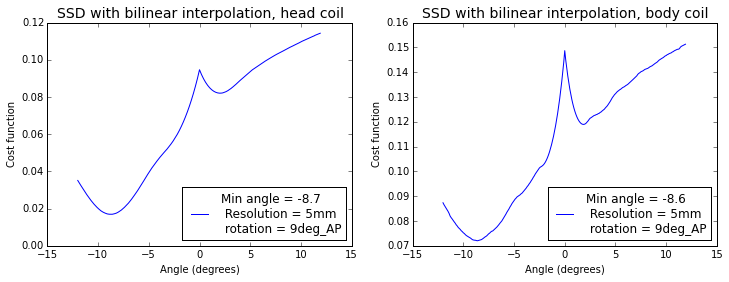

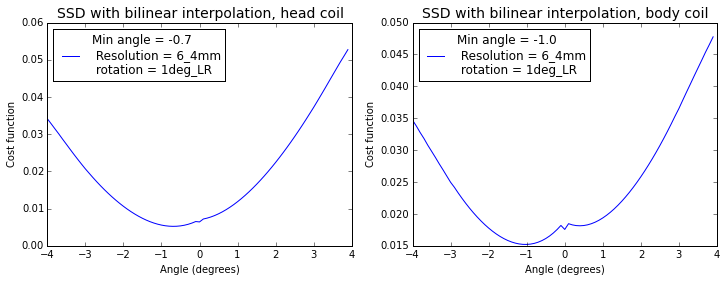

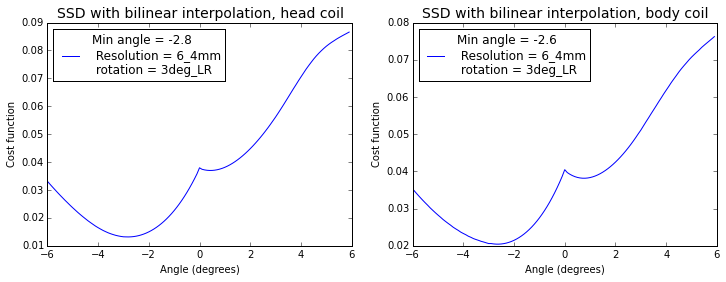

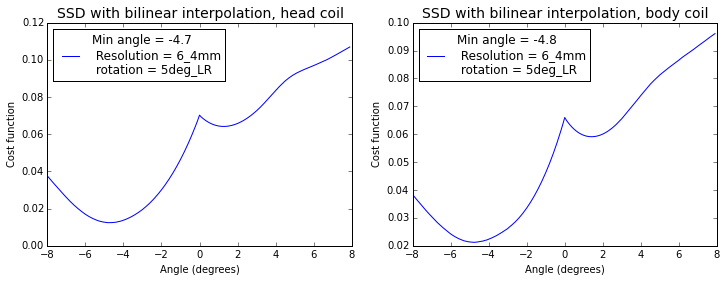

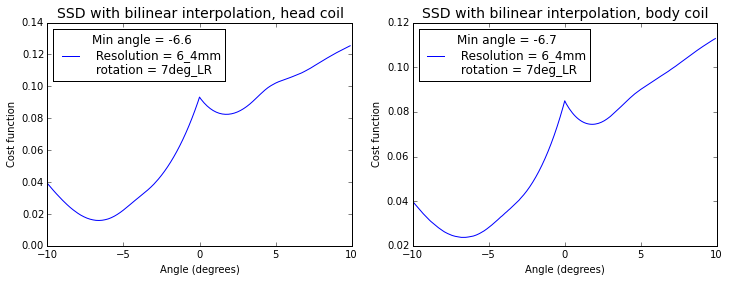

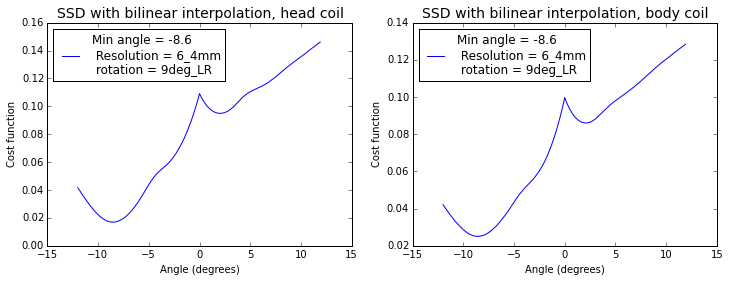

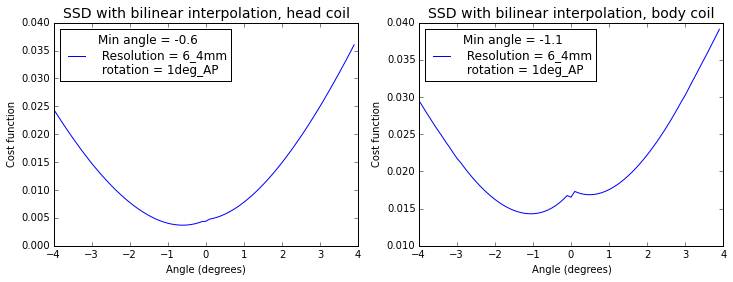

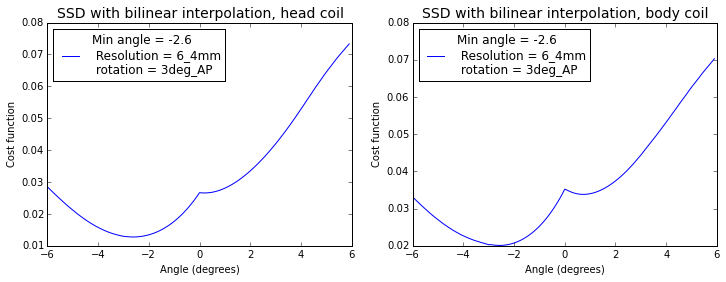

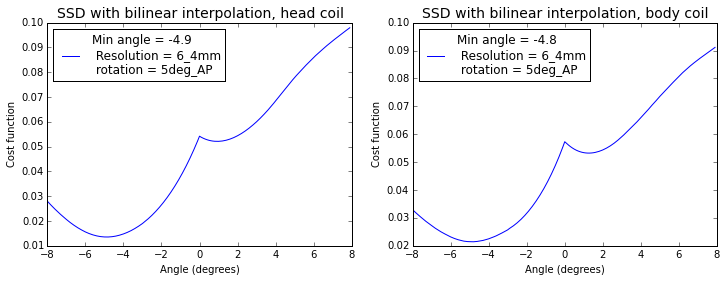

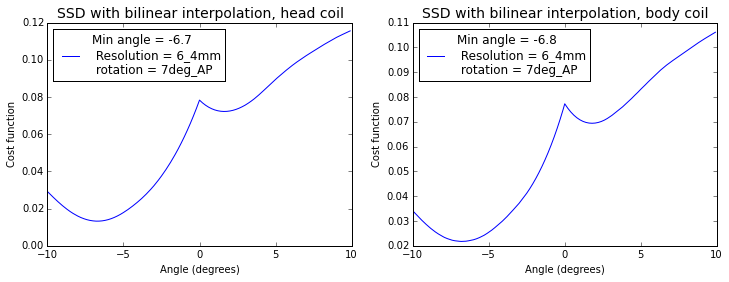

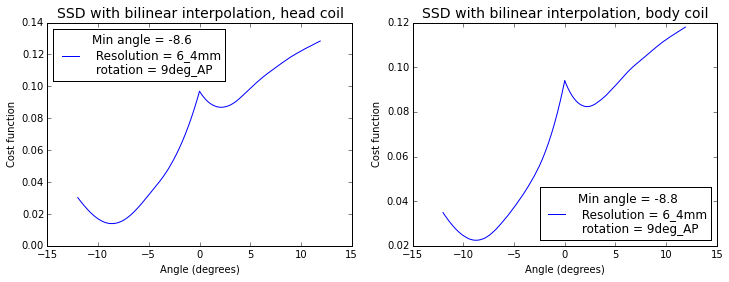

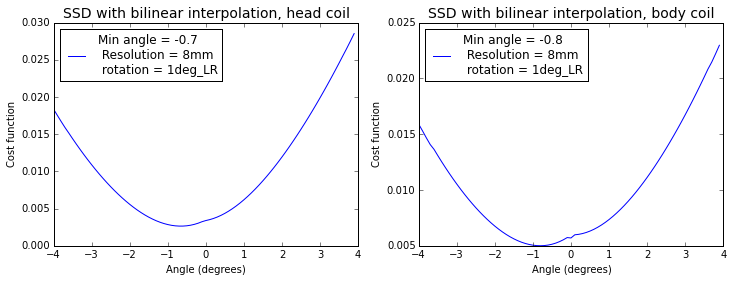

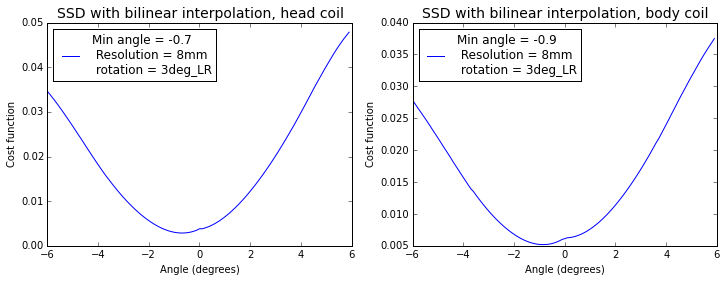

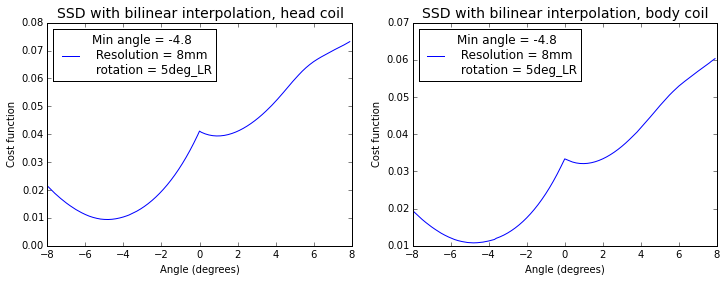

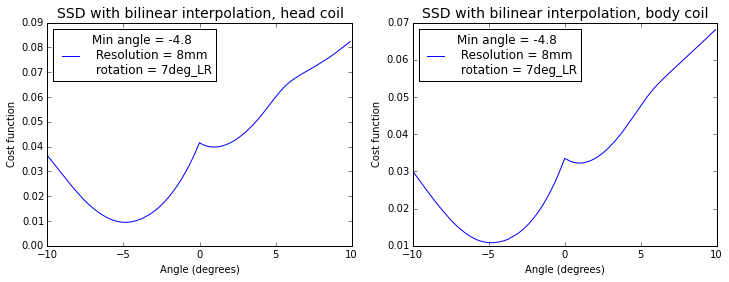

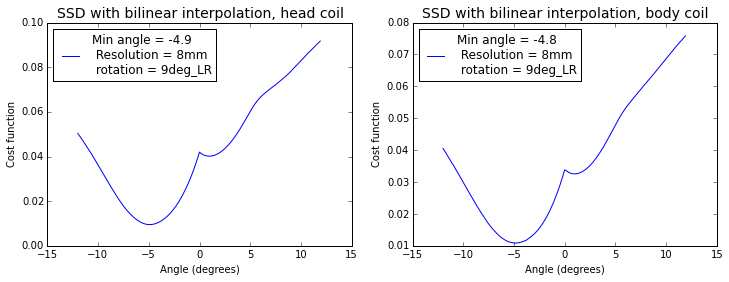

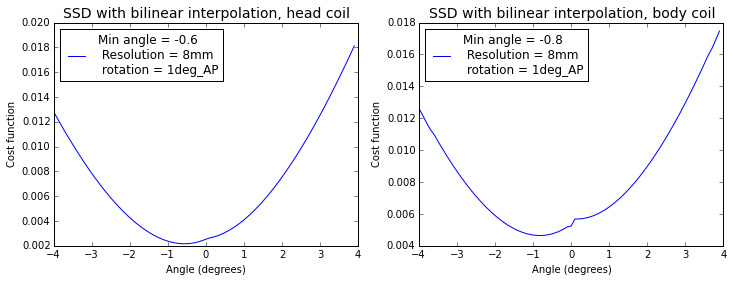

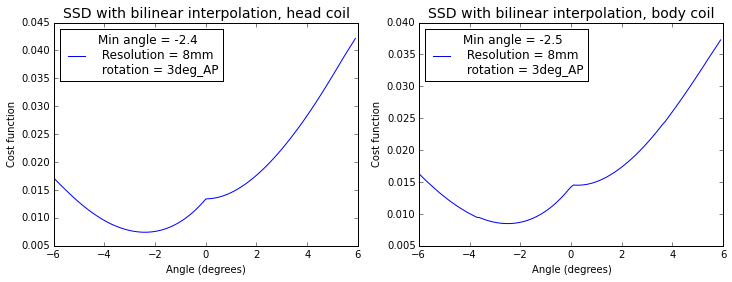

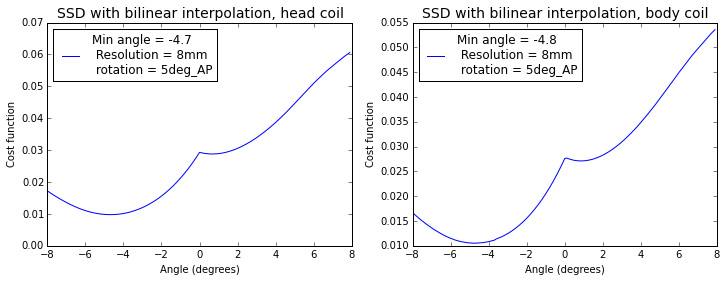

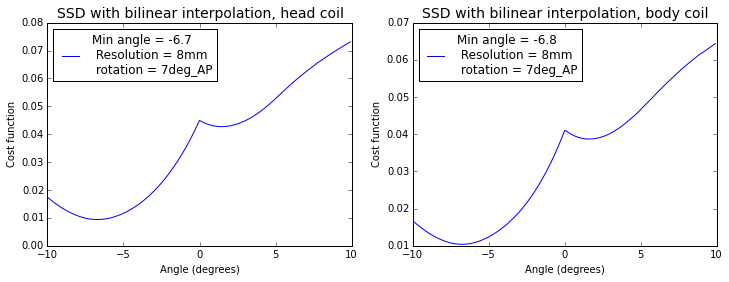

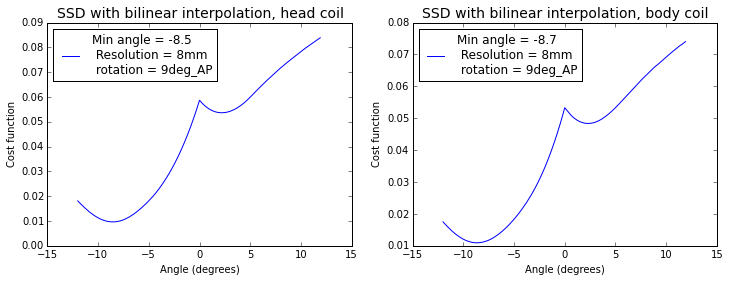

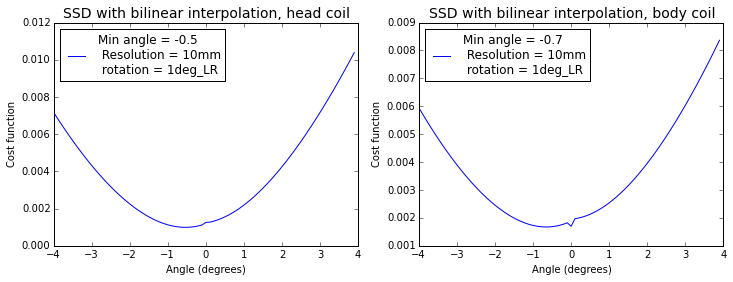

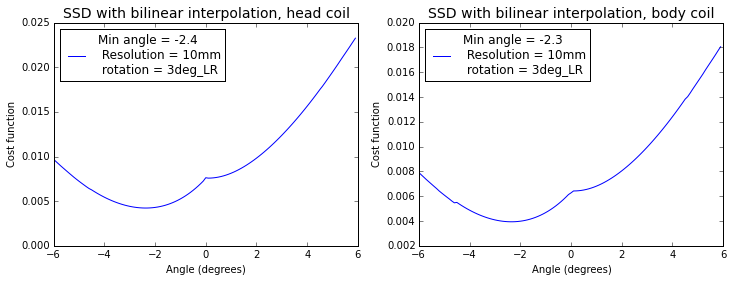

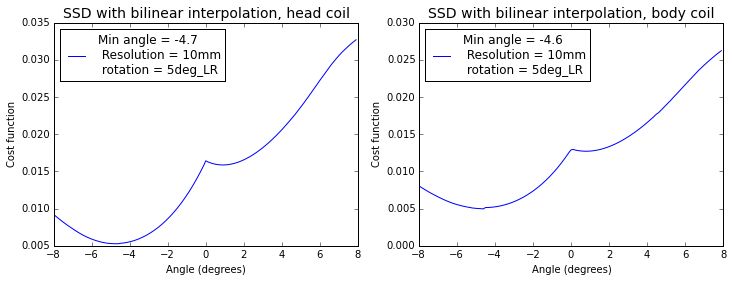

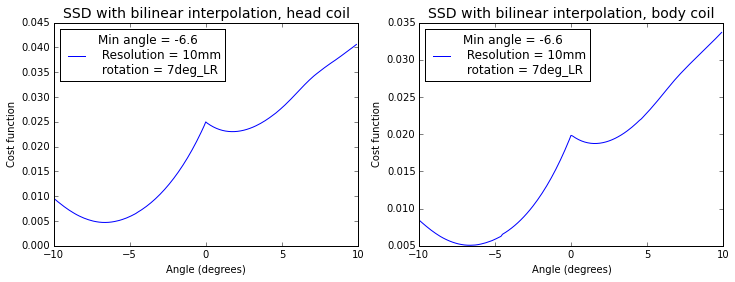

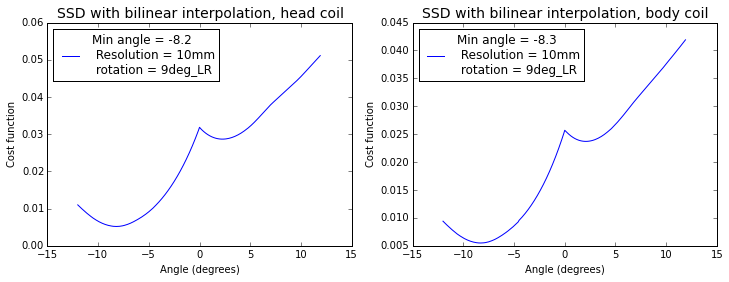

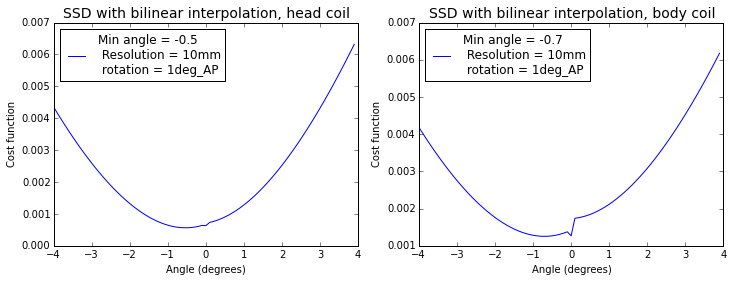

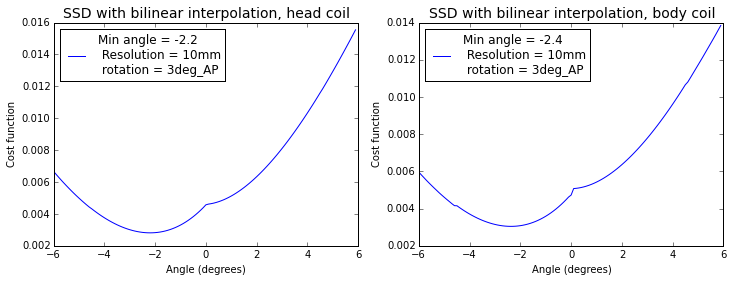

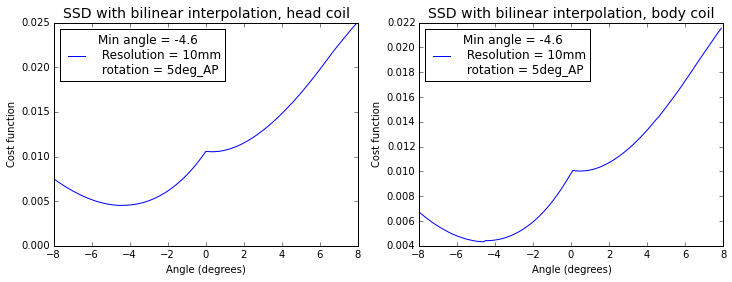

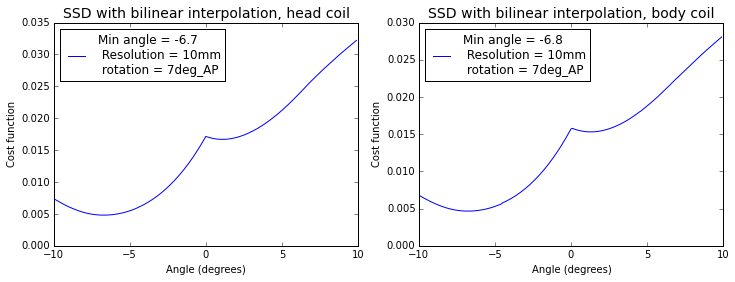

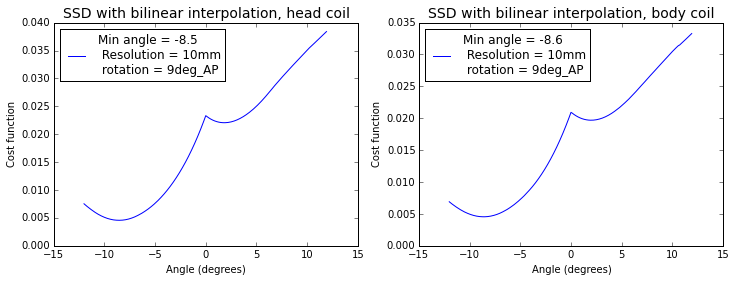

In [42]:
# repetition 0
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    for rot in rot_axes:
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        for deg in degrees:
            plt.figure(figsize=[12,4])
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-3,d+3,0.1)
                cost = rot_cost_func(data_dict[res][coil]['iso'][0],data_dict[res][coil][rot][deg][0],thetas,axis=ax)
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, cost, res, 'bilinear',deg+'_'+rot, coil)
            plt.show()

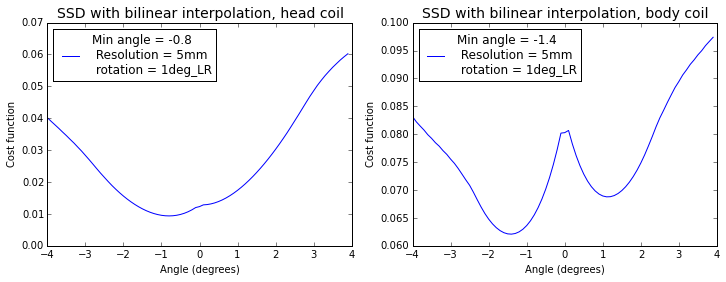

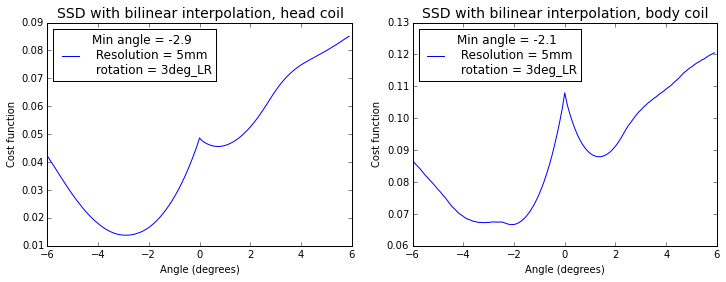

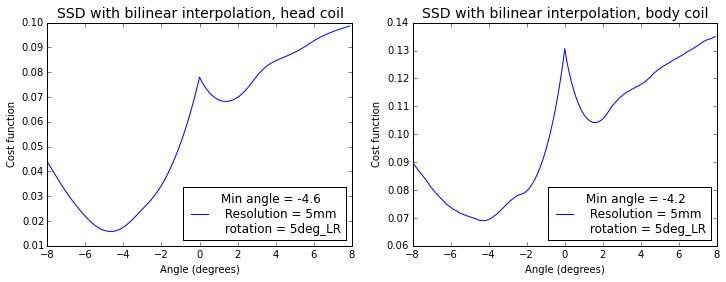

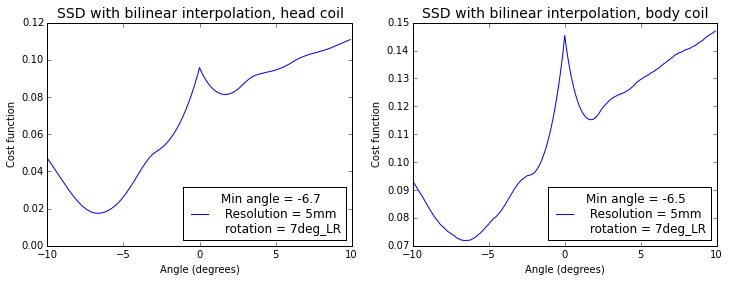

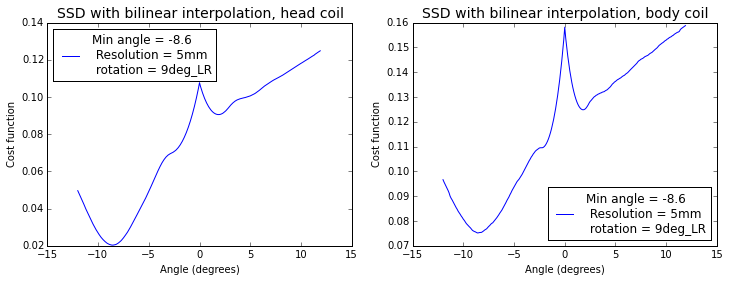

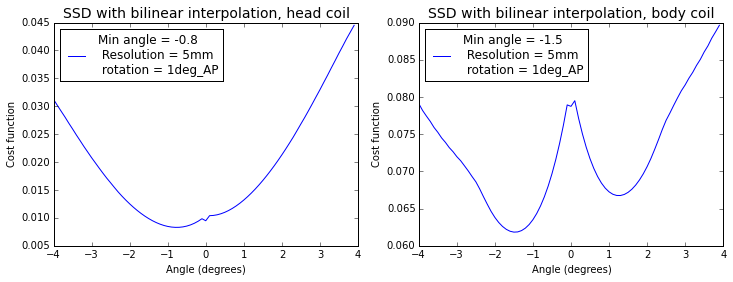

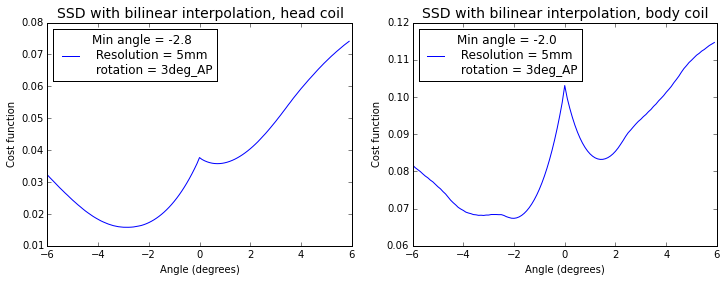

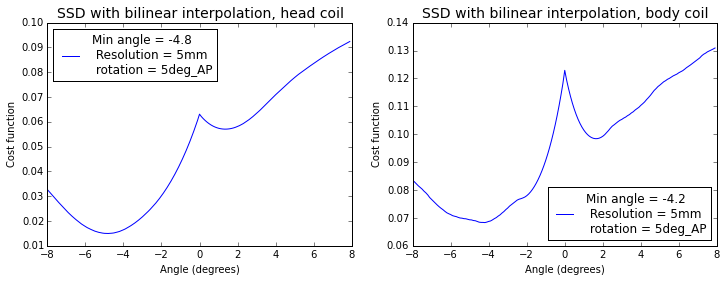

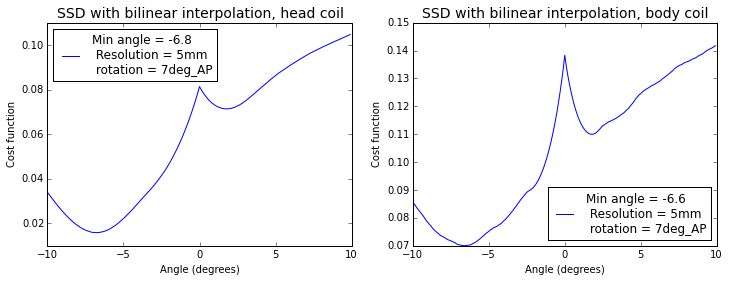

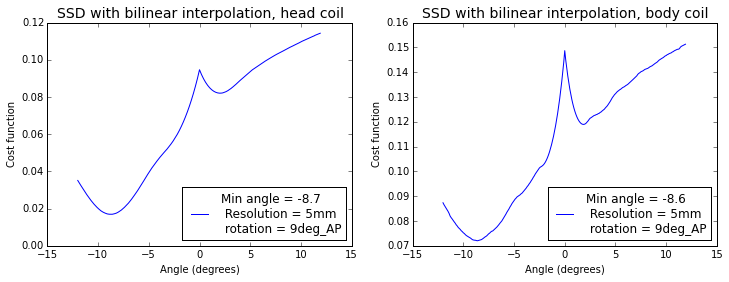

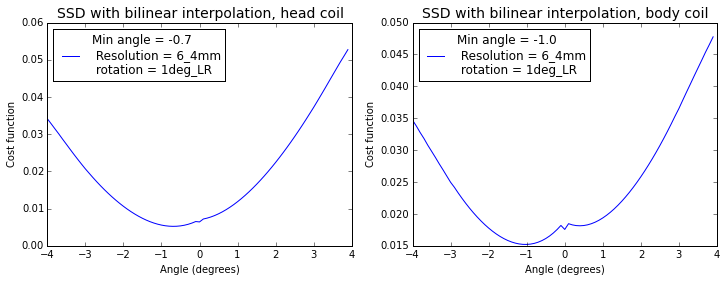

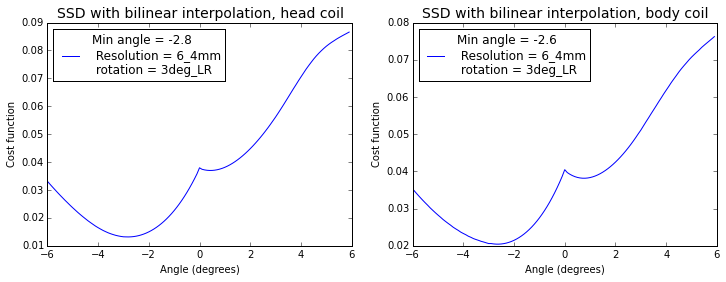

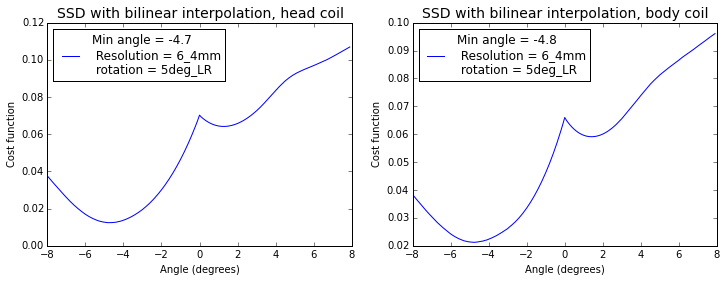

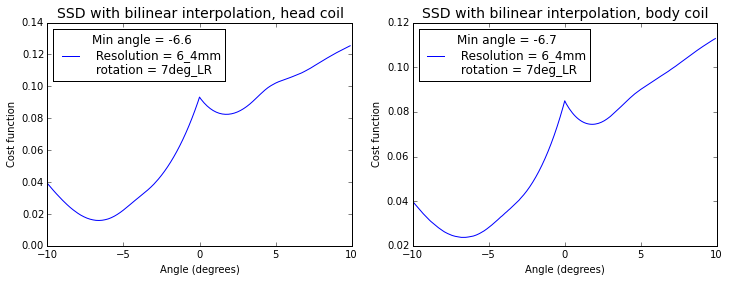

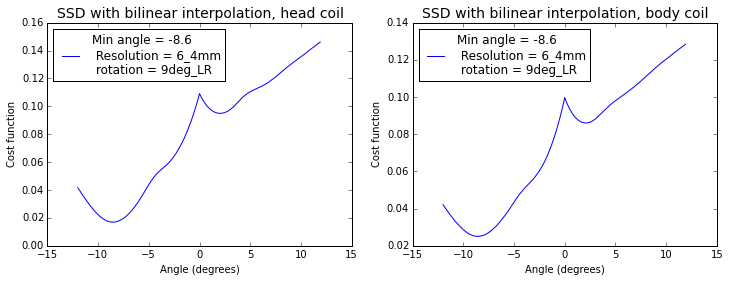

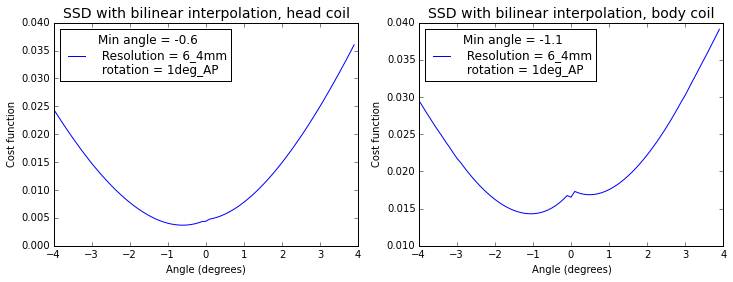

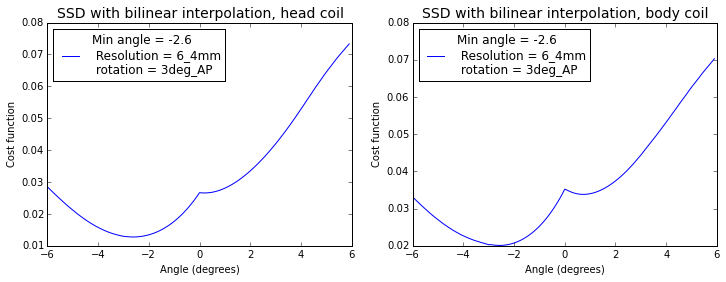

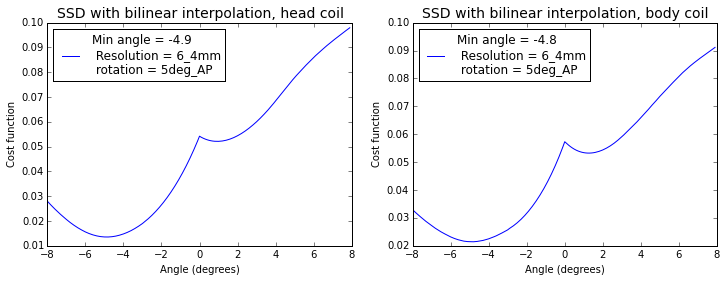

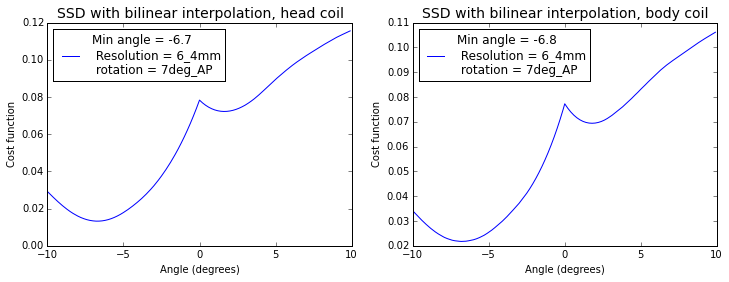

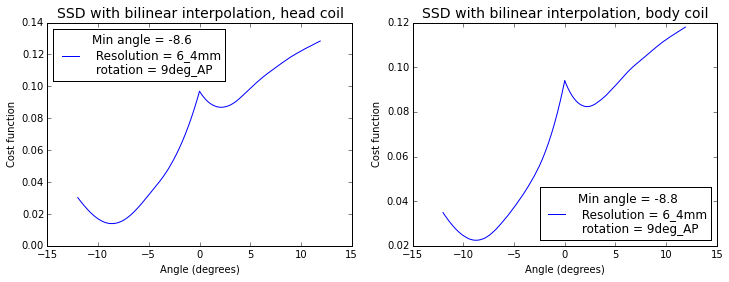

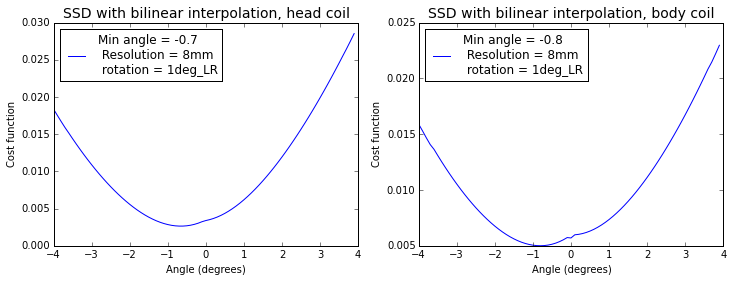

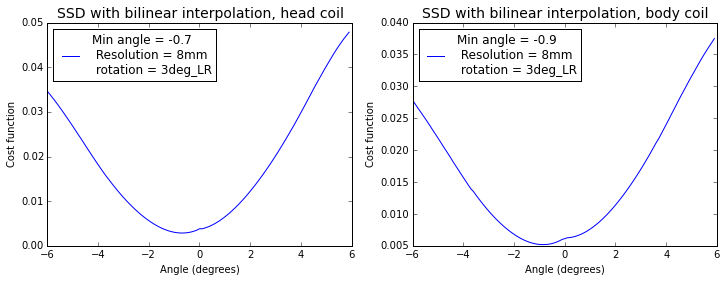

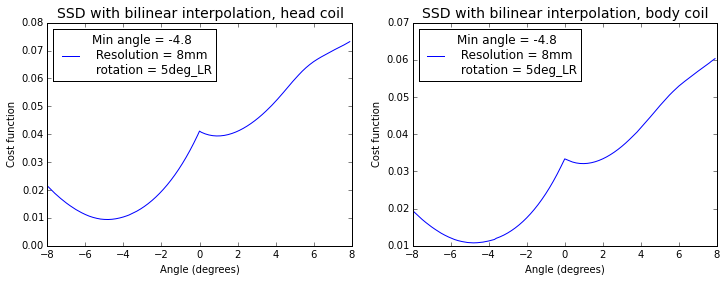

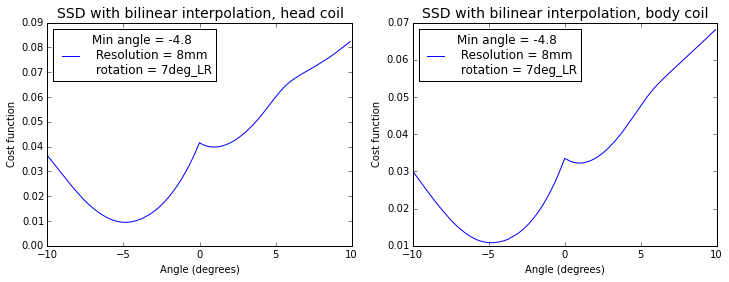

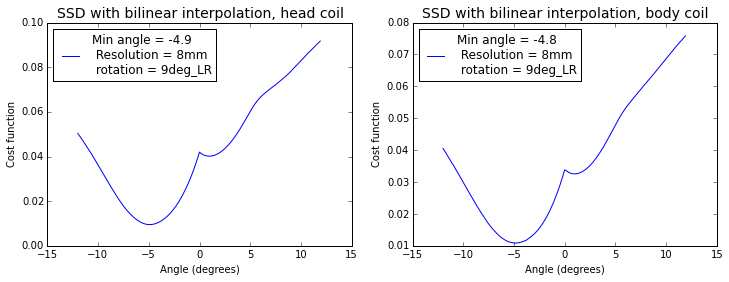

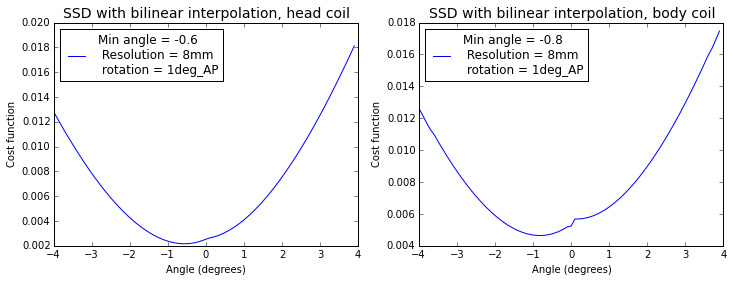

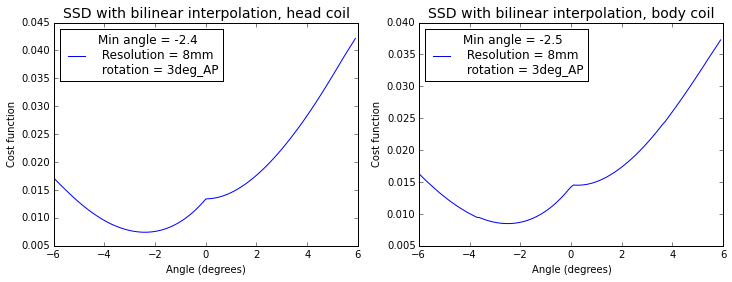

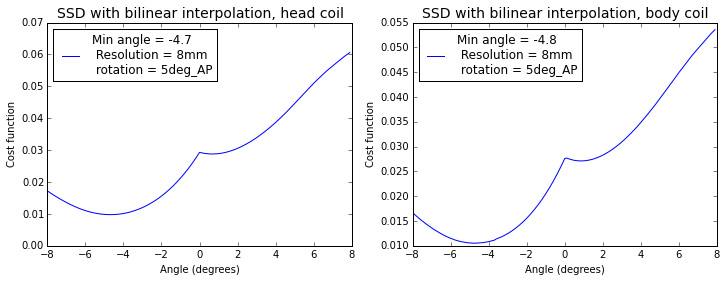

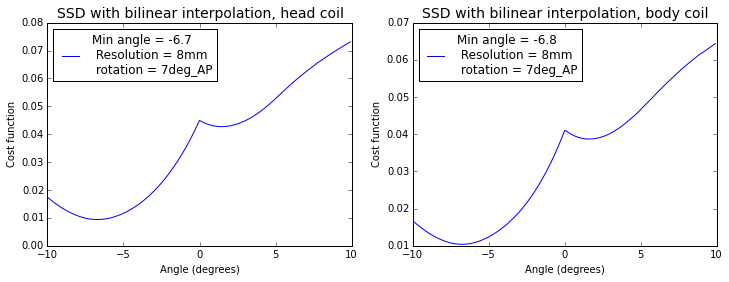

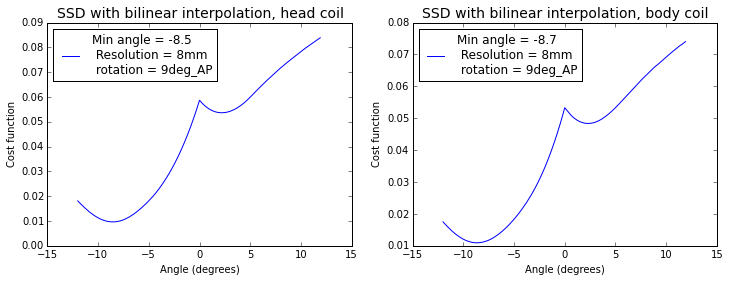

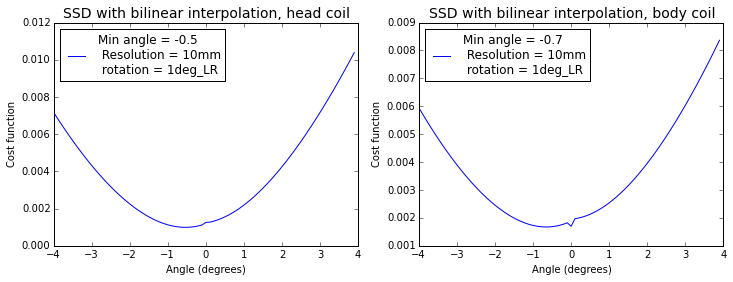

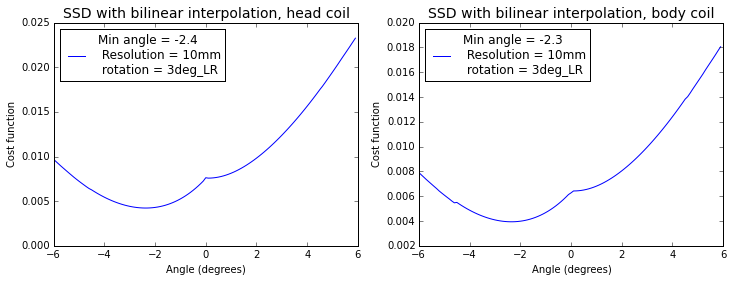

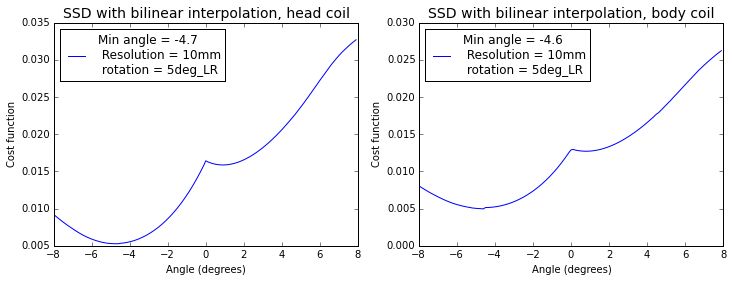

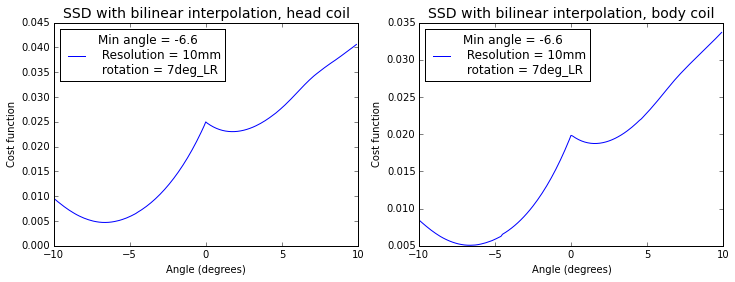

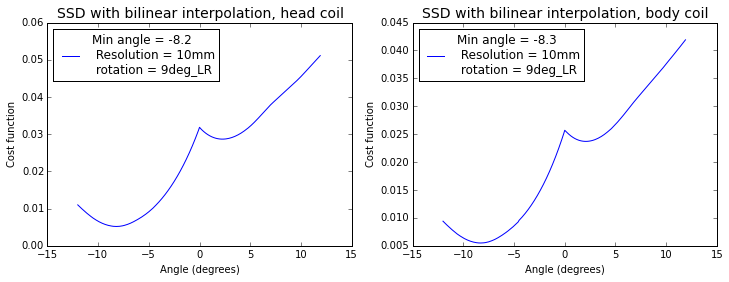

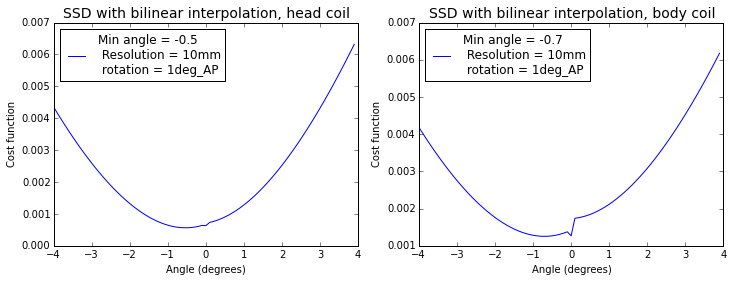

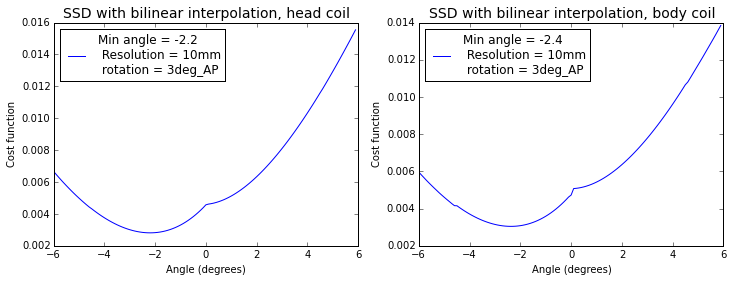

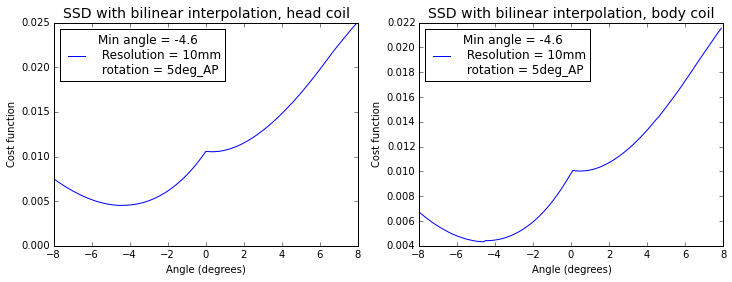

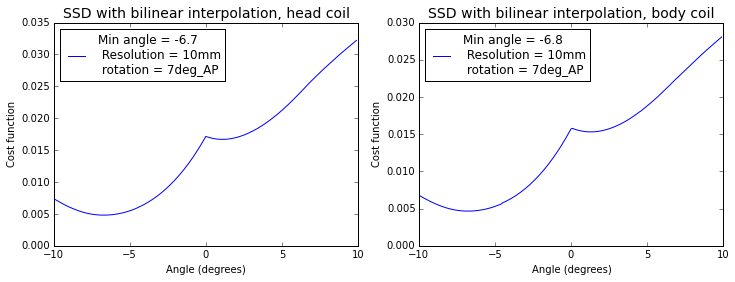

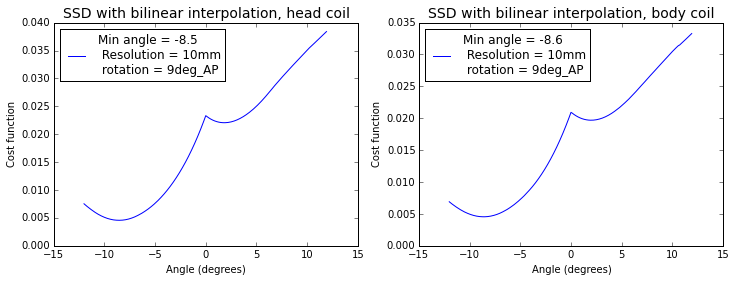

In [56]:
# repetition 1
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    for rot in rot_axes:
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        for deg in degrees:
            plt.figure(figsize=[12,4])
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-3,d+3,0.1)
                cost = rot_cost_func(data_dict[res][coil]['iso'][1],data_dict[res][coil][rot][deg][1],thetas,axis=ax)
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, cost, res, 'bilinear',deg+'_'+rot, coil)
            plt.show()

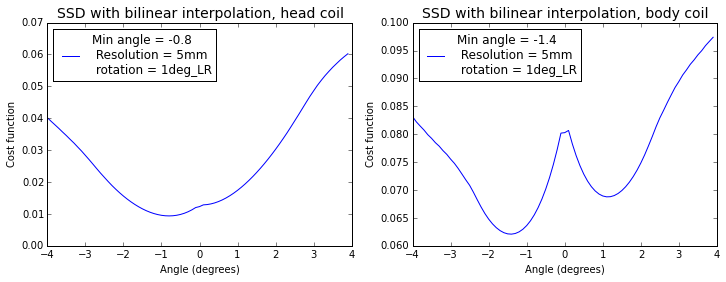

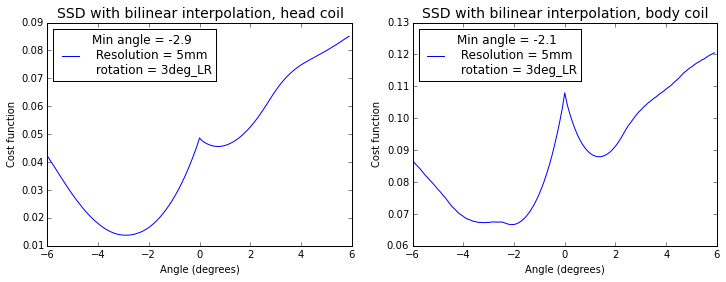

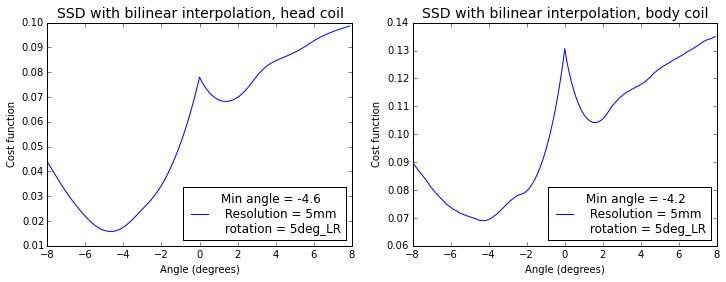

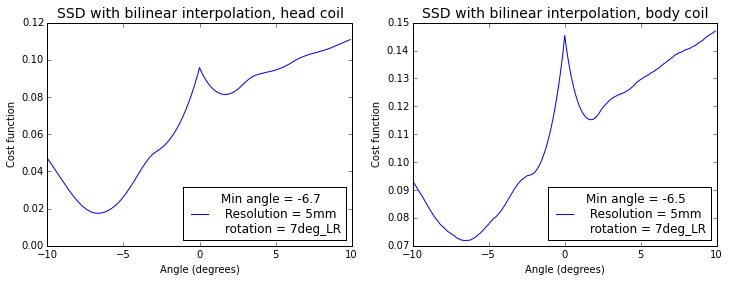

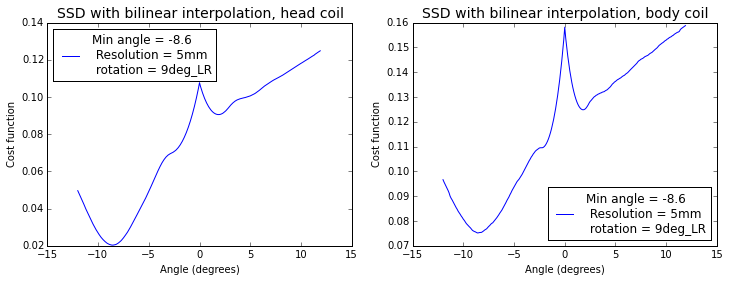

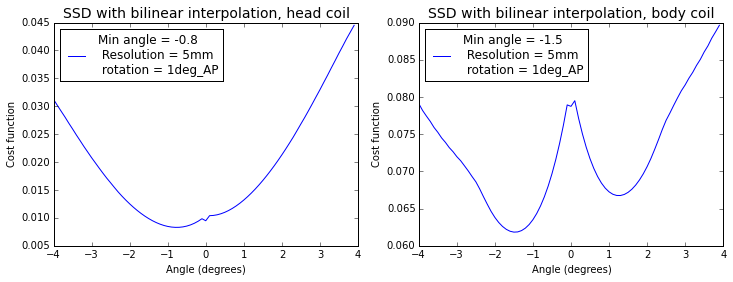

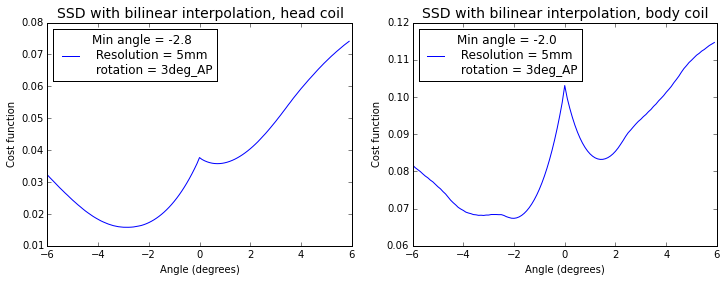

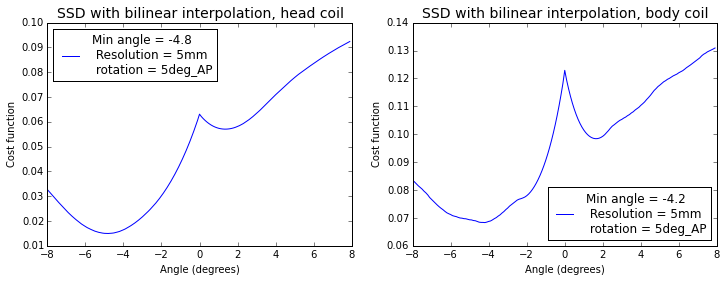

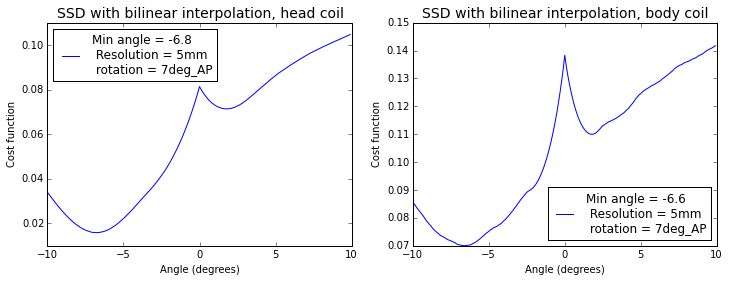

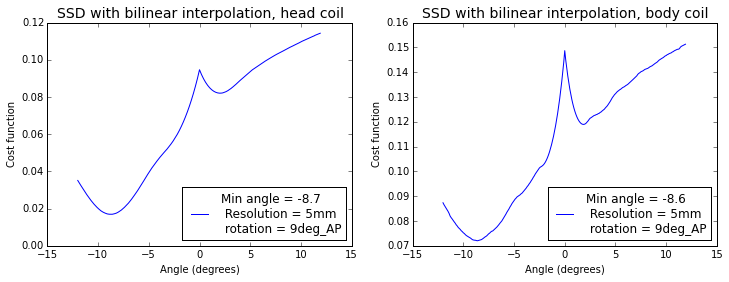

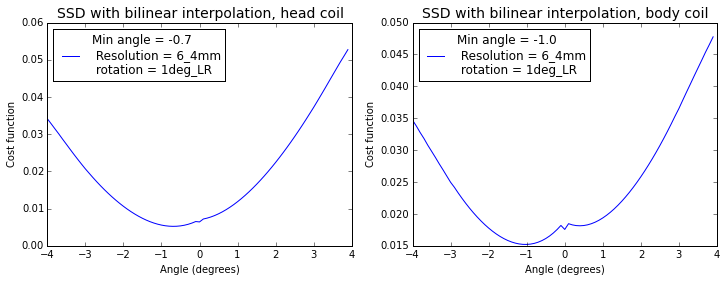

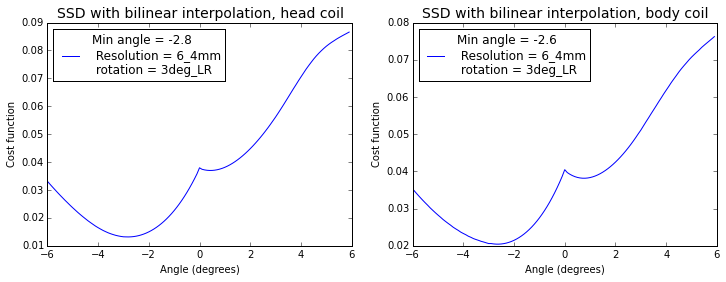

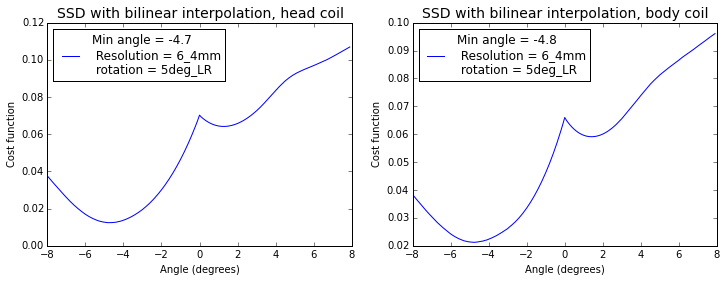

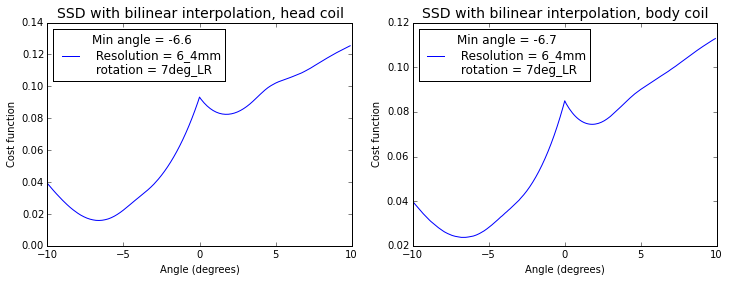

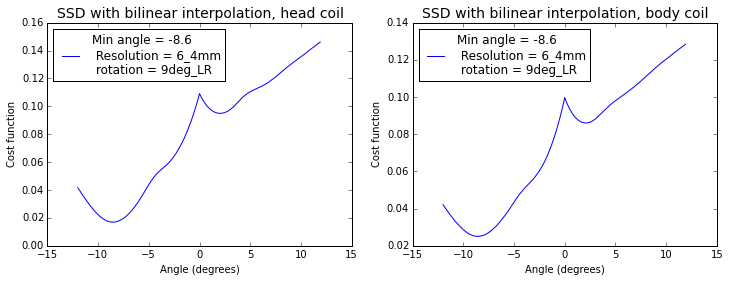

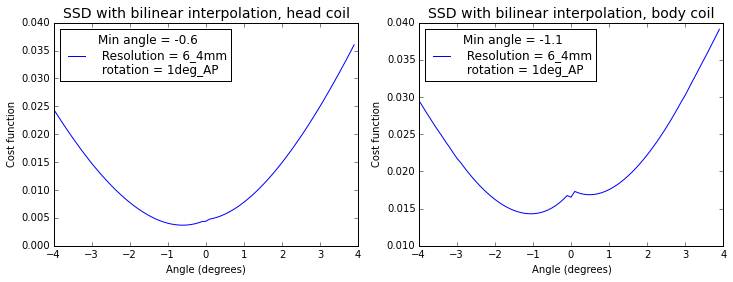

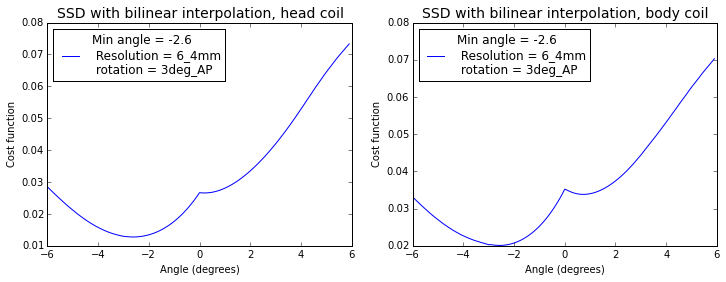

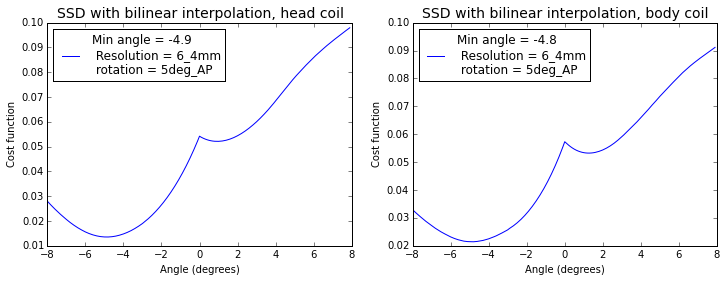

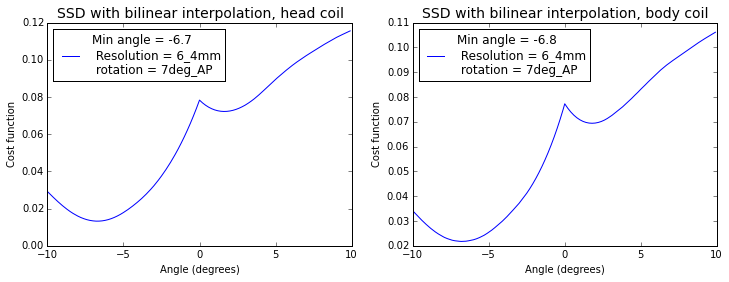

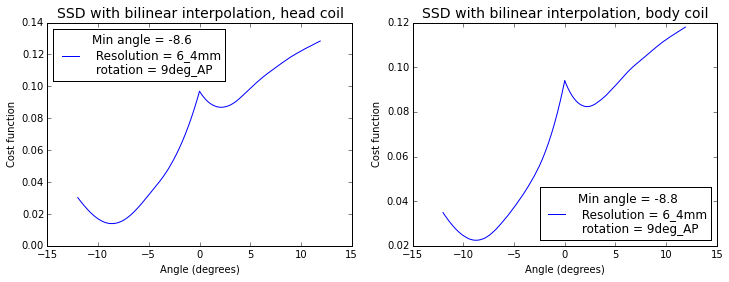

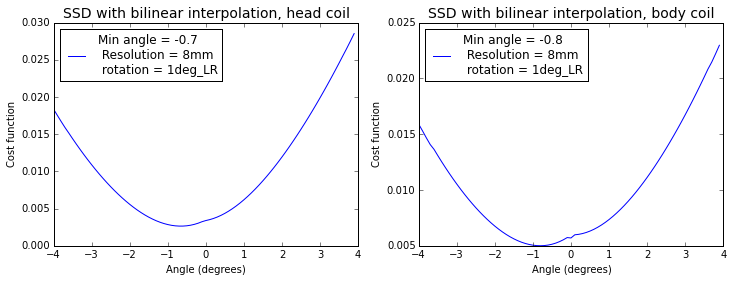

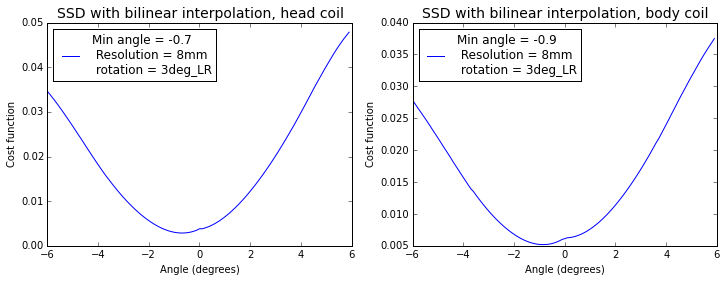

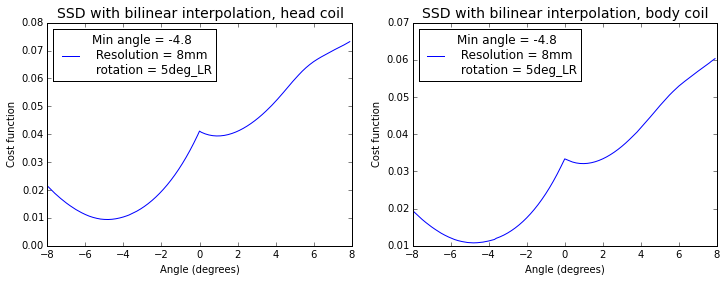

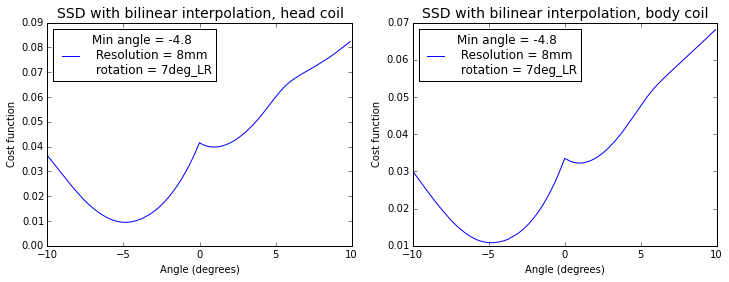

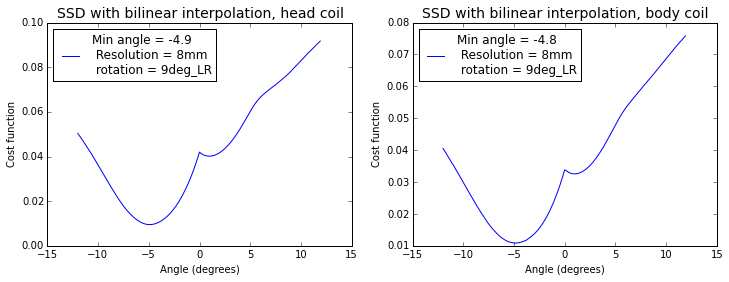

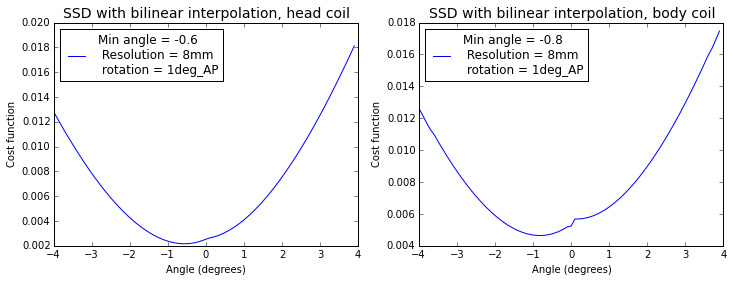

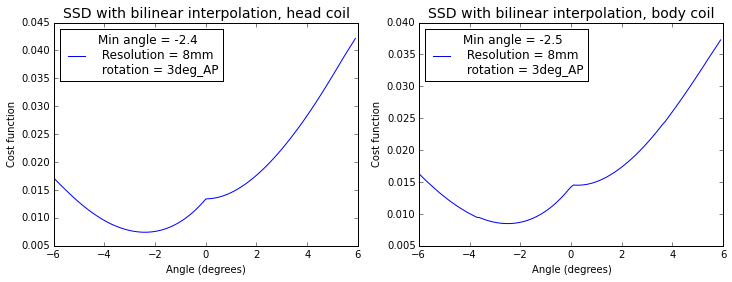

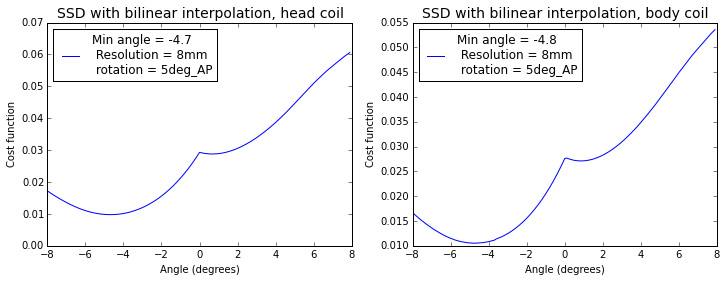

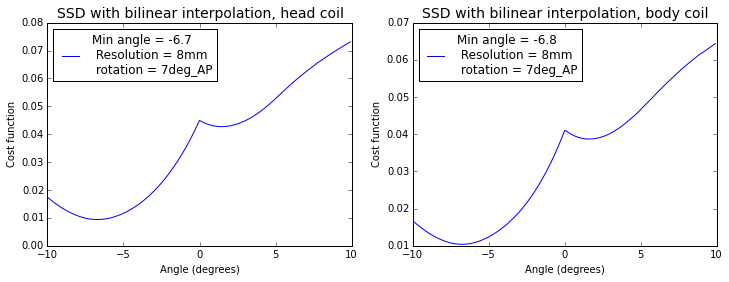

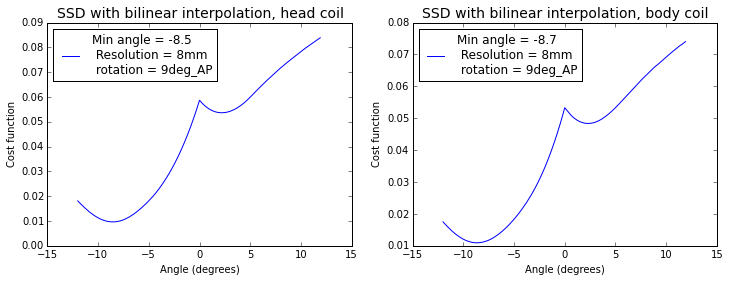

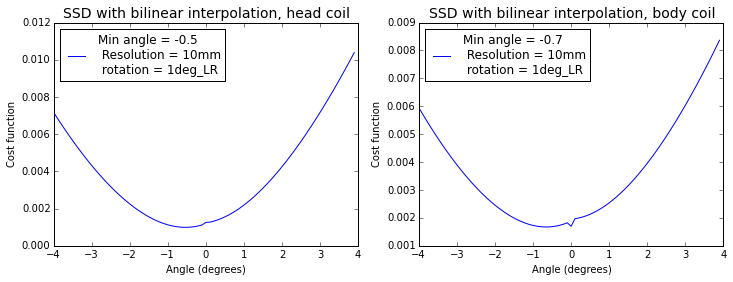

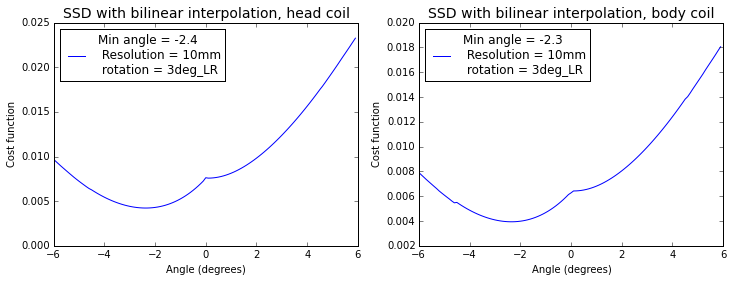

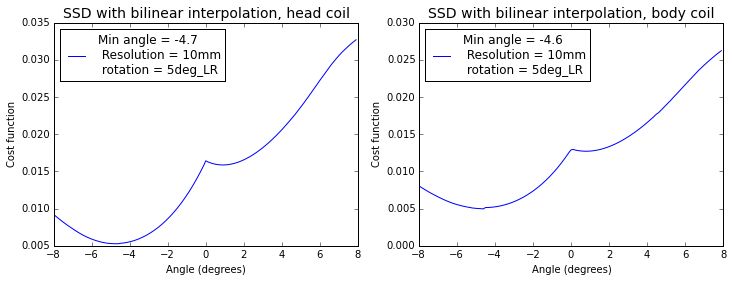

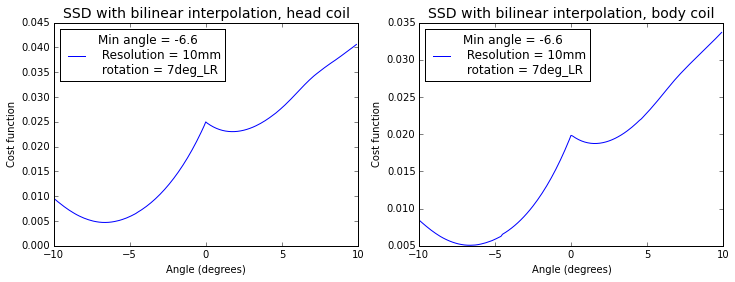

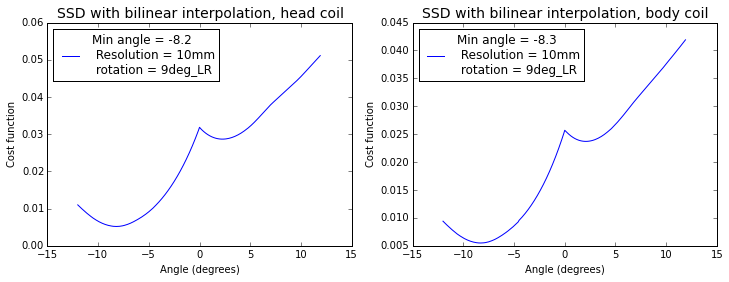

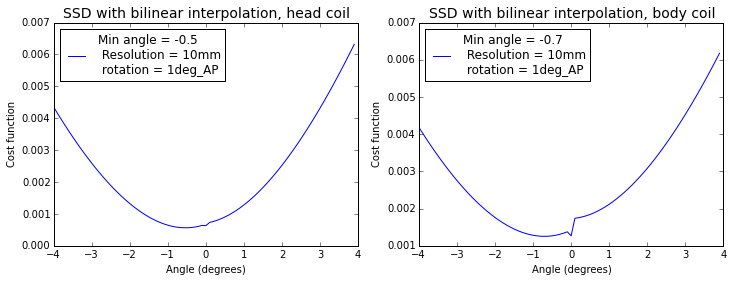

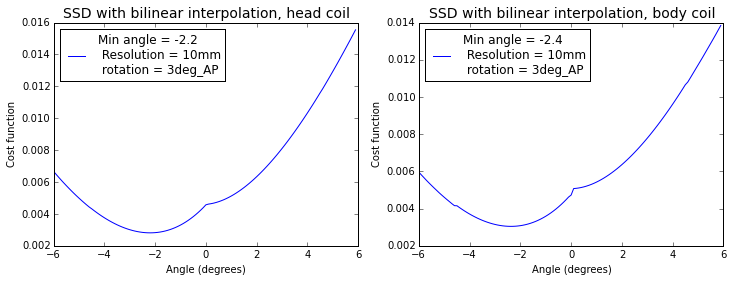

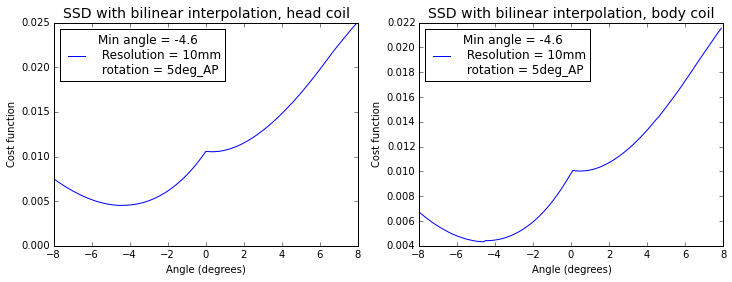

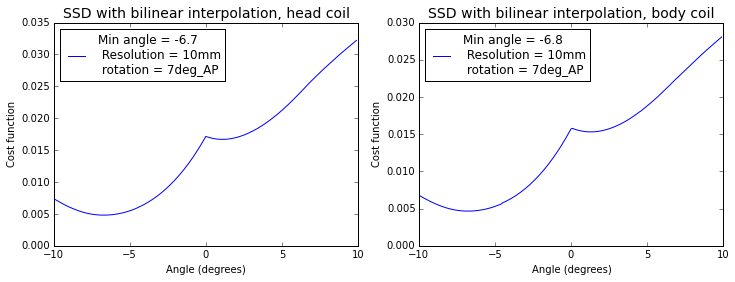

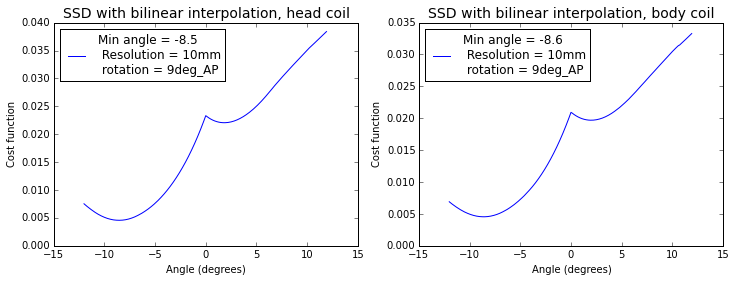

In [57]:
# repetition 2
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    for rot in rot_axes:
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        for deg in degrees:
            plt.figure(figsize=[12,4])
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-3,d+3,0.1)
                cost = rot_cost_func(data_dict[res][coil]['iso'][2],data_dict[res][coil][rot][deg][2],thetas,axis=ax)
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, cost, res, 'bilinear',deg+'_'+rot, coil)
            plt.show()

5mm head LR 1deg 3deg
5mm body LR 1deg 3deg


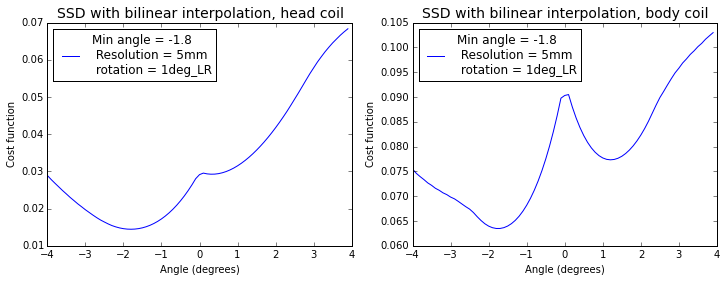

5mm head LR 3deg 5deg
5mm body LR 3deg 5deg


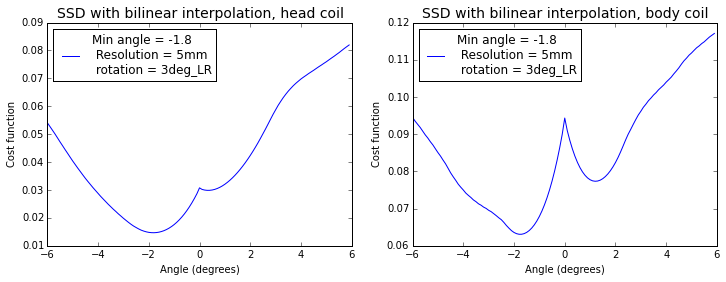

5mm head LR 5deg 7deg
5mm body LR 5deg 7deg


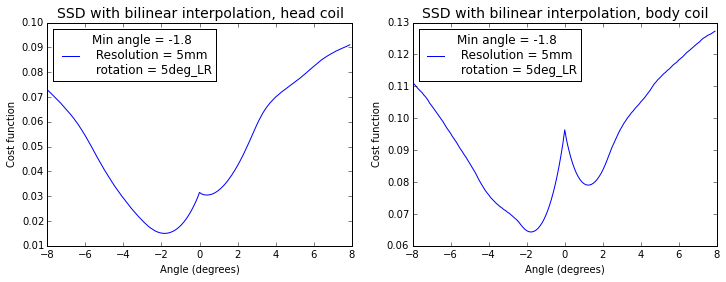

5mm head LR 7deg 9deg
5mm body LR 7deg 9deg


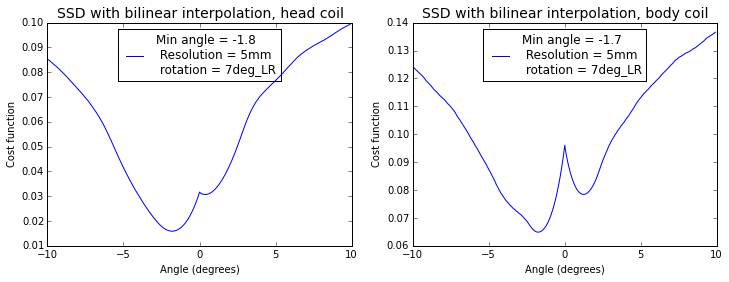

5mm head AP 1deg 3deg
5mm body AP 1deg 3deg


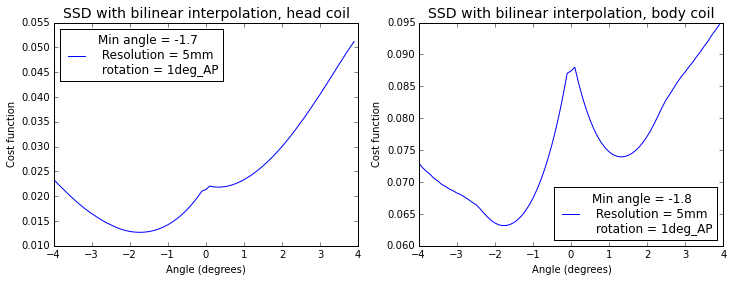

5mm head AP 3deg 5deg
5mm body AP 3deg 5deg


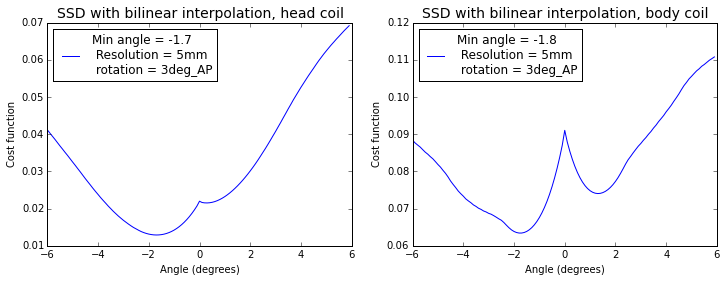

5mm head AP 5deg 7deg
5mm body AP 5deg 7deg


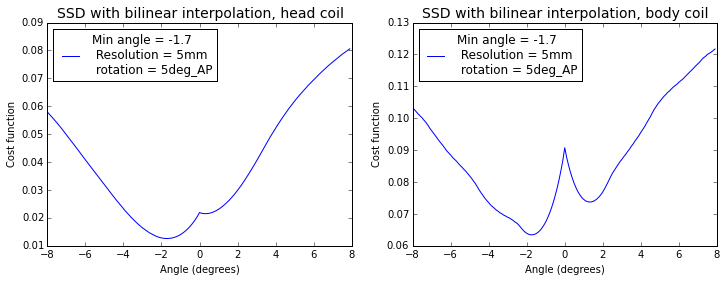

5mm head AP 7deg 9deg
5mm body AP 7deg 9deg


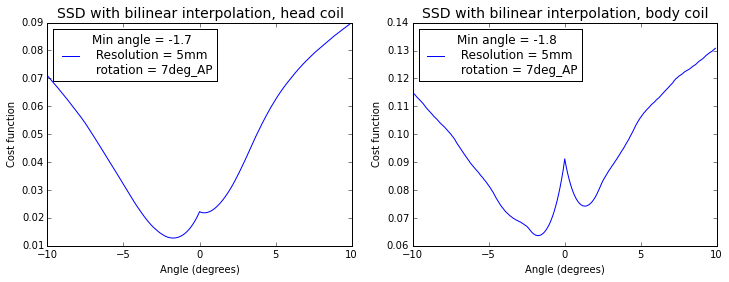

6_4mm head LR 1deg 3deg
6_4mm body LR 1deg 3deg


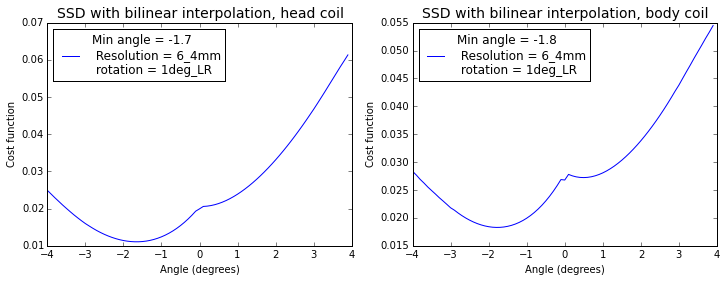

6_4mm head LR 3deg 5deg
6_4mm body LR 3deg 5deg


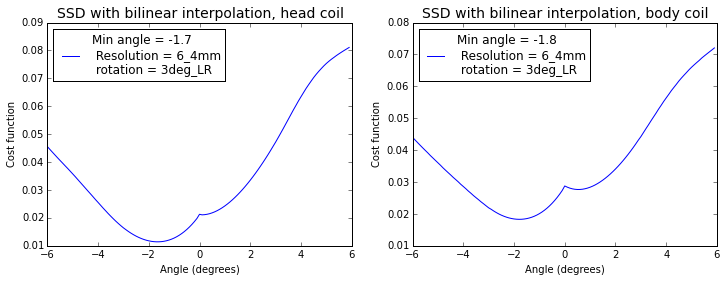

6_4mm head LR 5deg 7deg
6_4mm body LR 5deg 7deg


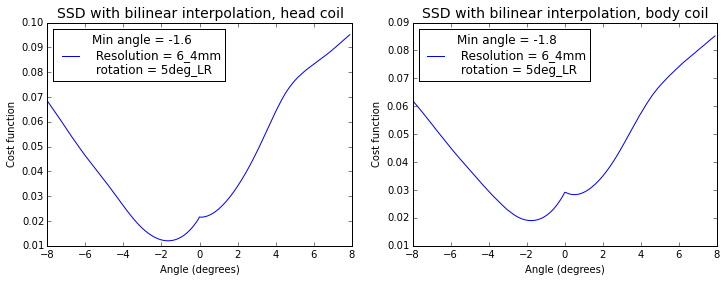

6_4mm head LR 7deg 9deg
6_4mm body LR 7deg 9deg


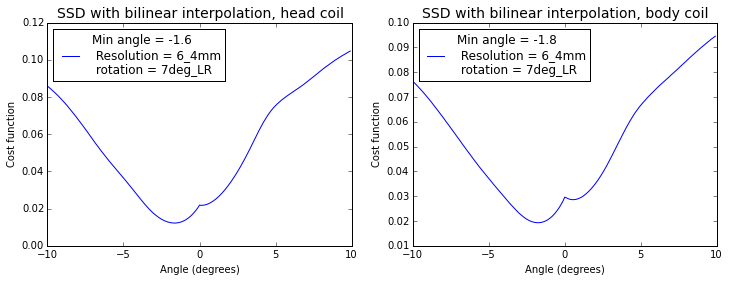

6_4mm head AP 1deg 3deg
6_4mm body AP 1deg 3deg


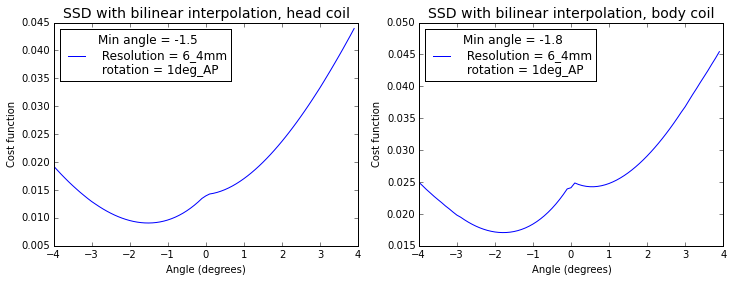

6_4mm head AP 3deg 5deg
6_4mm body AP 3deg 5deg


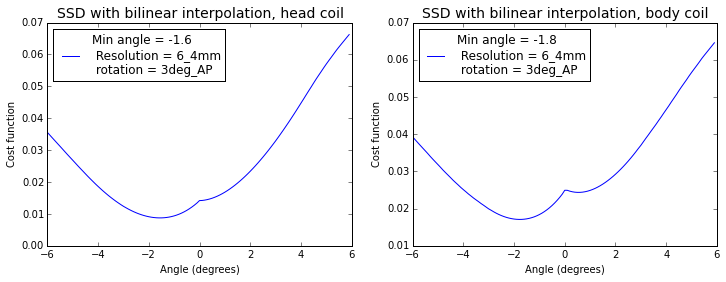

6_4mm head AP 5deg 7deg
6_4mm body AP 5deg 7deg


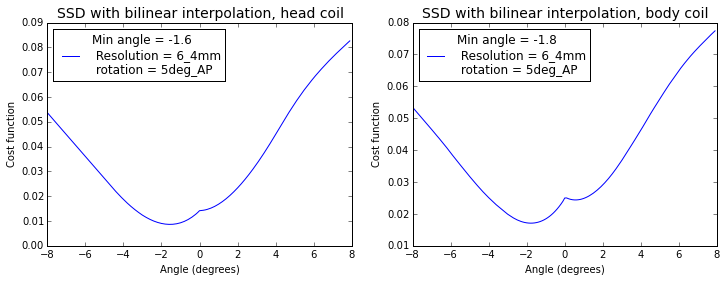

6_4mm head AP 7deg 9deg
6_4mm body AP 7deg 9deg


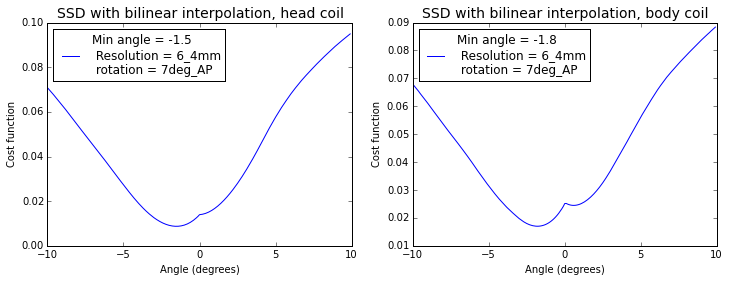

8mm head LR 1deg 3deg
8mm body LR 1deg 3deg


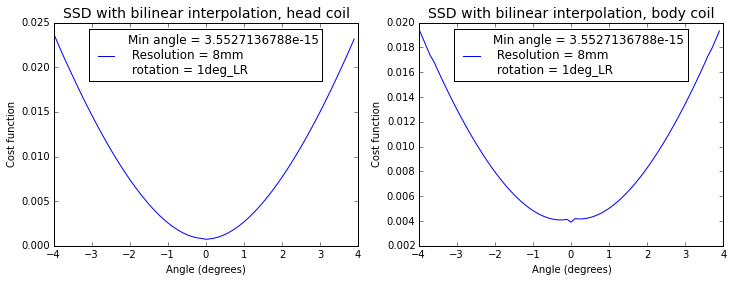

8mm head LR 3deg 5deg
8mm body LR 3deg 5deg


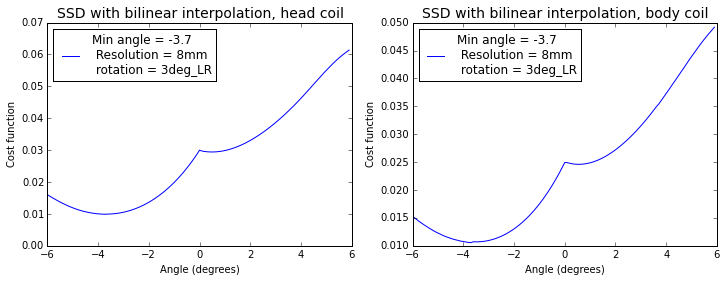

8mm head LR 5deg 7deg
8mm body LR 5deg 7deg


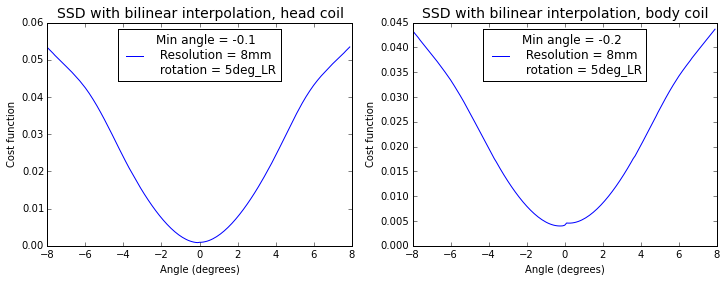

8mm head LR 7deg 9deg
8mm body LR 7deg 9deg


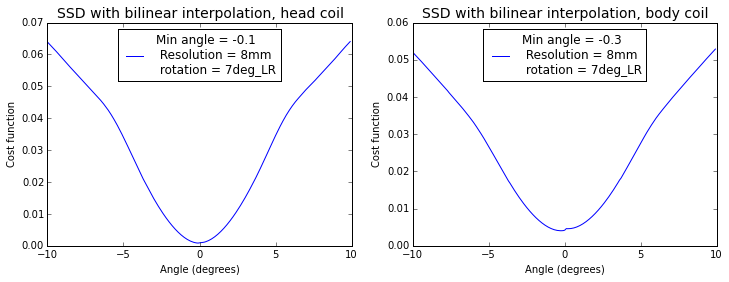

8mm head AP 1deg 3deg
8mm body AP 1deg 3deg


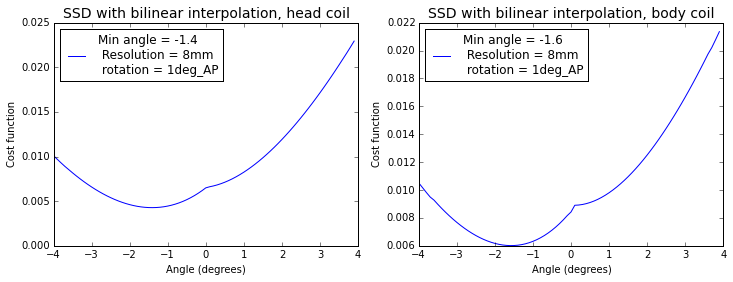

8mm head AP 3deg 5deg
8mm body AP 3deg 5deg


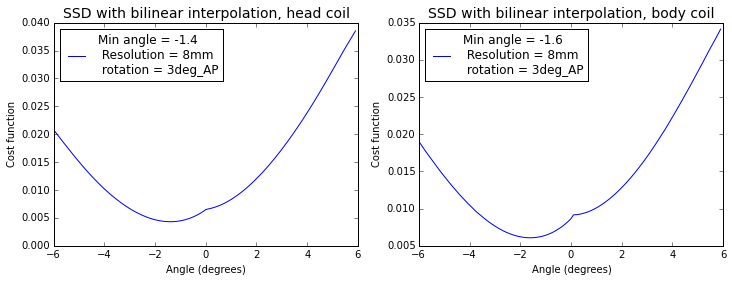

8mm head AP 5deg 7deg
8mm body AP 5deg 7deg


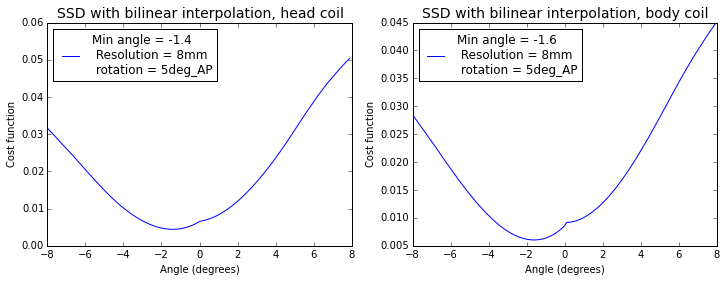

8mm head AP 7deg 9deg
8mm body AP 7deg 9deg


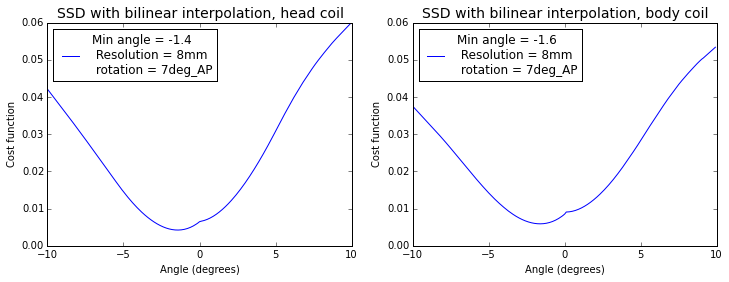

10mm head LR 1deg 3deg
10mm body LR 1deg 3deg


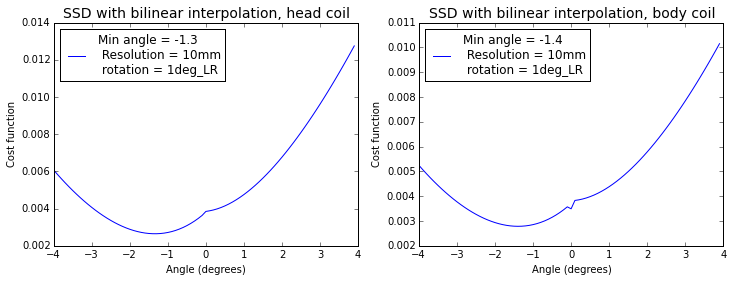

10mm head LR 3deg 5deg
10mm body LR 3deg 5deg


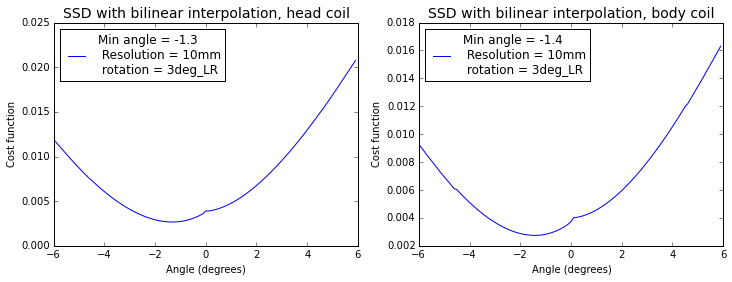

10mm head LR 5deg 7deg
10mm body LR 5deg 7deg


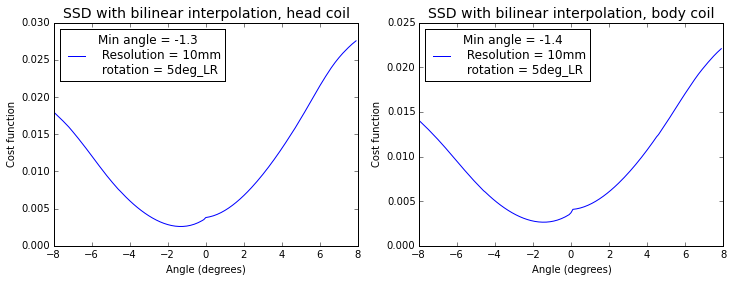

10mm head LR 7deg 9deg
10mm body LR 7deg 9deg


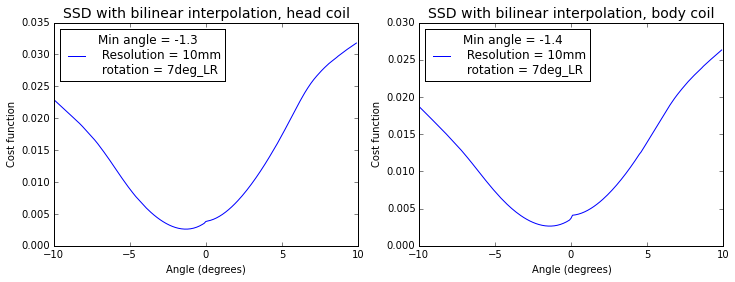

10mm head AP 1deg 3deg
10mm body AP 1deg 3deg


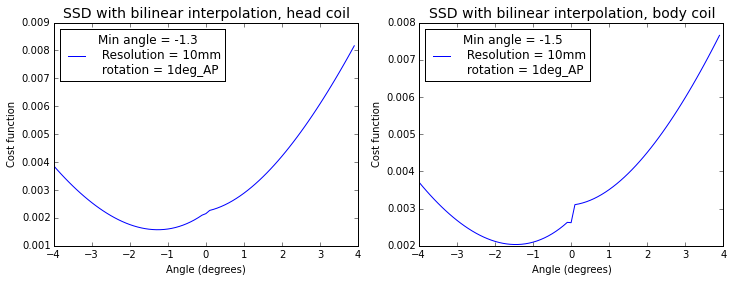

10mm head AP 3deg 5deg
10mm body AP 3deg 5deg


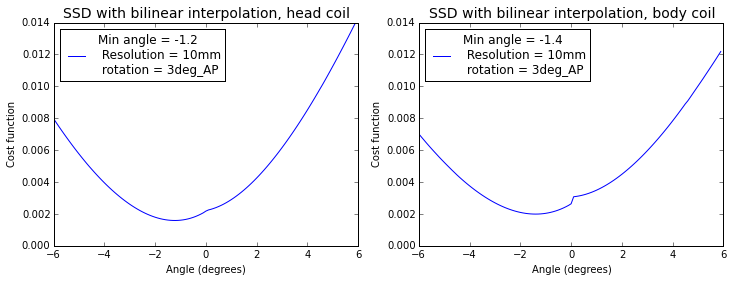

10mm head AP 5deg 7deg
10mm body AP 5deg 7deg


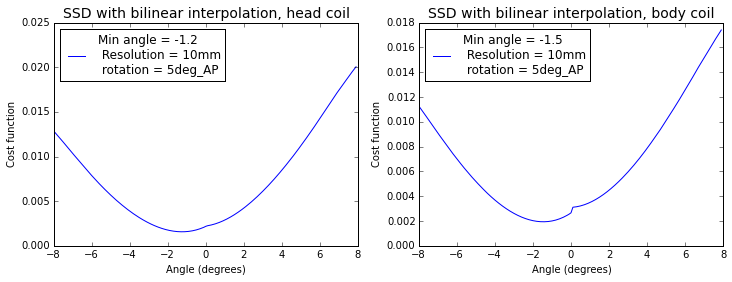

10mm head AP 7deg 9deg
10mm body AP 7deg 9deg


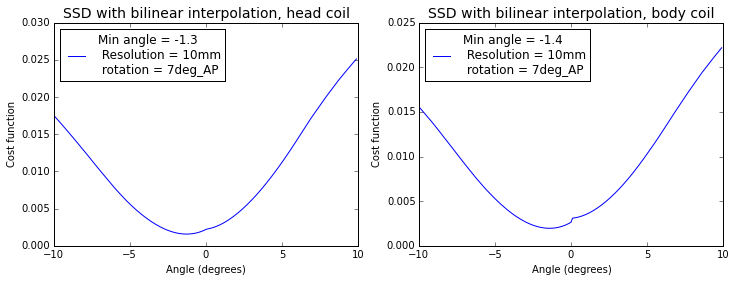

In [78]:
# cross registering
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    for rot in rot_axes:
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        for idx_deg, deg in enumerate(degrees[:-1]):
            plt.figure(figsize=[12,4])
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-3,d+3,0.1)
                print res,coil,rot,deg,degrees[idx_deg+1]
                cost = rot_cost_func(data_dict[res][coil][rot][deg][0],data_dict[res][coil][rot][degrees[idx_deg+1]][0],thetas,axis=ax)
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, cost, res, 'bilinear',deg+'_'+rot, coil)
            plt.show()

5mm head LR 3deg 1deg
5mm body LR 3deg 1deg


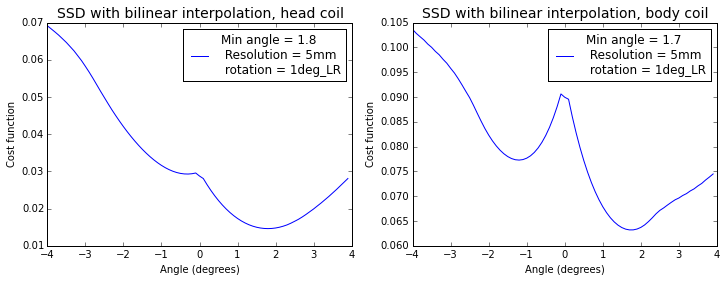

5mm head LR 5deg 3deg
5mm body LR 5deg 3deg


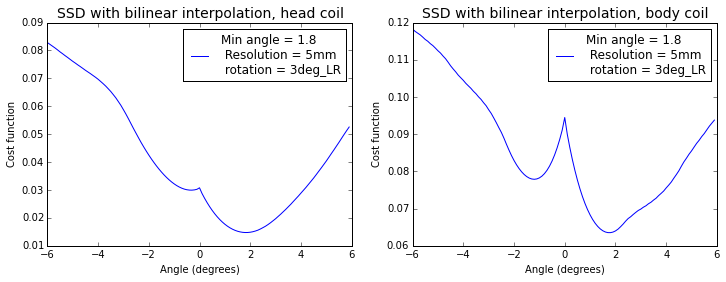

5mm head LR 7deg 5deg
5mm body LR 7deg 5deg


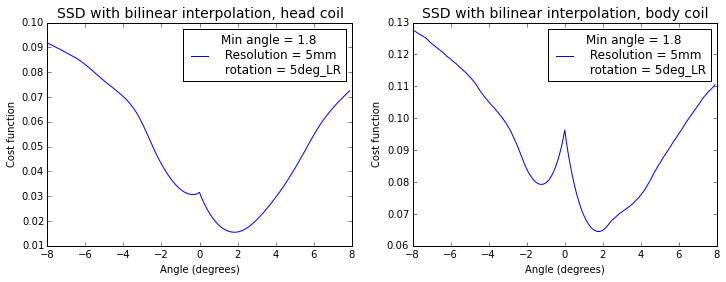

5mm head LR 9deg 7deg
5mm body LR 9deg 7deg


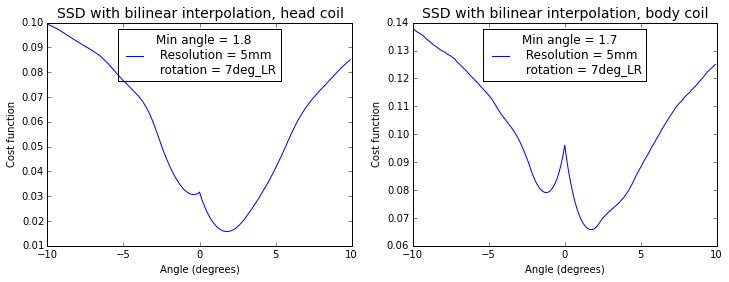

5mm head AP 3deg 1deg
5mm body AP 3deg 1deg


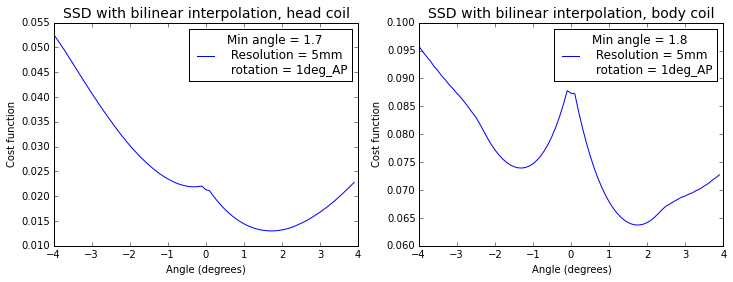

5mm head AP 5deg 3deg
5mm body AP 5deg 3deg


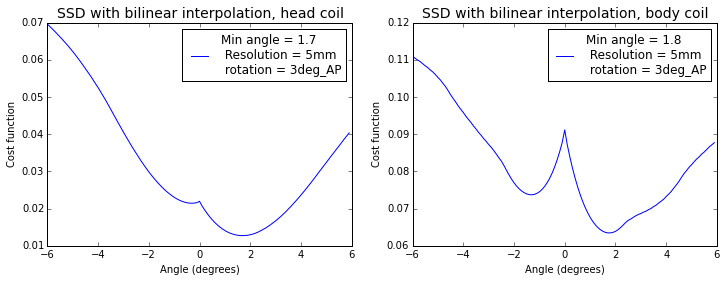

5mm head AP 7deg 5deg
5mm body AP 7deg 5deg


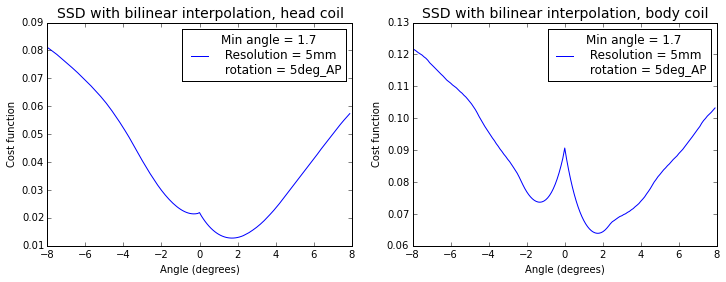

5mm head AP 9deg 7deg
5mm body AP 9deg 7deg


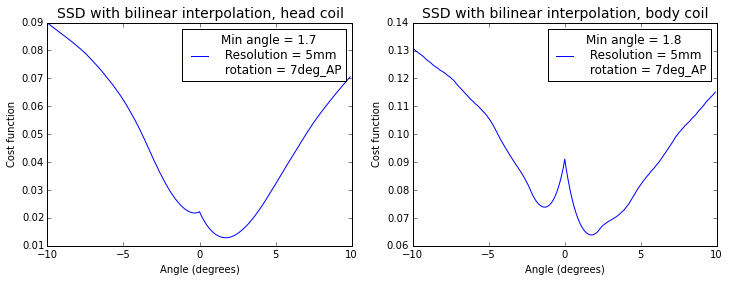

6_4mm head LR 3deg 1deg
6_4mm body LR 3deg 1deg


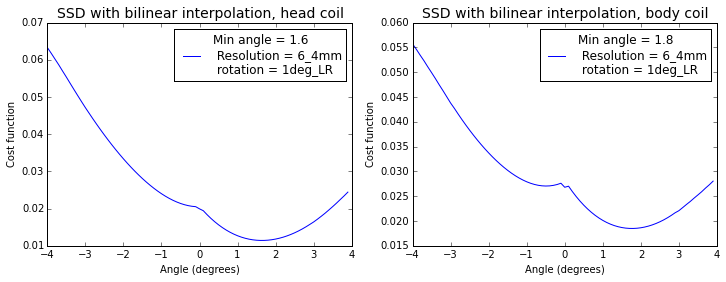

6_4mm head LR 5deg 3deg
6_4mm body LR 5deg 3deg


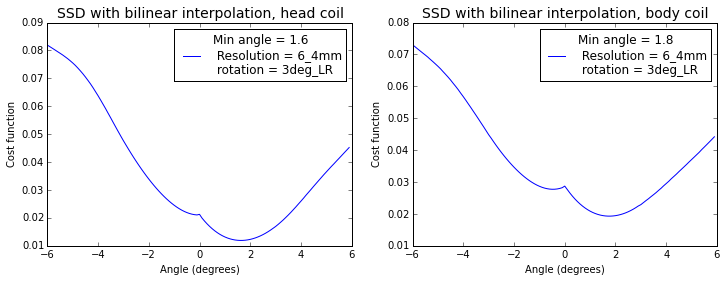

6_4mm head LR 7deg 5deg
6_4mm body LR 7deg 5deg


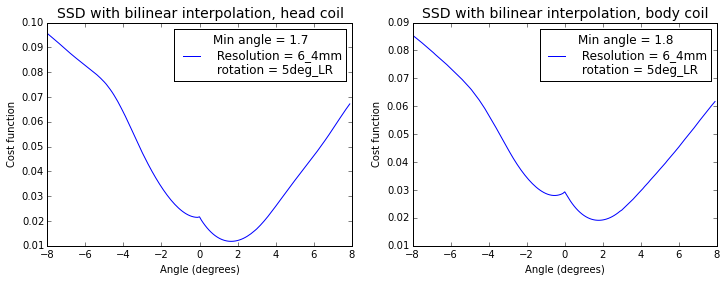

6_4mm head LR 9deg 7deg
6_4mm body LR 9deg 7deg


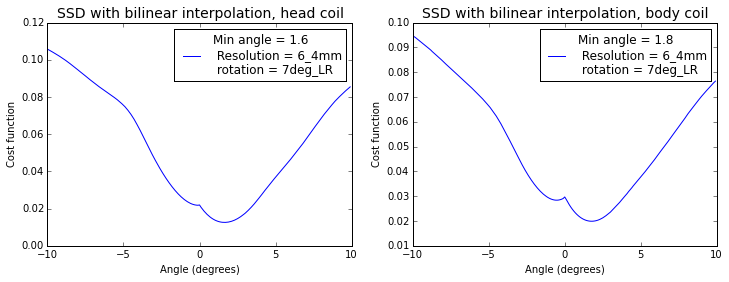

6_4mm head AP 3deg 1deg
6_4mm body AP 3deg 1deg


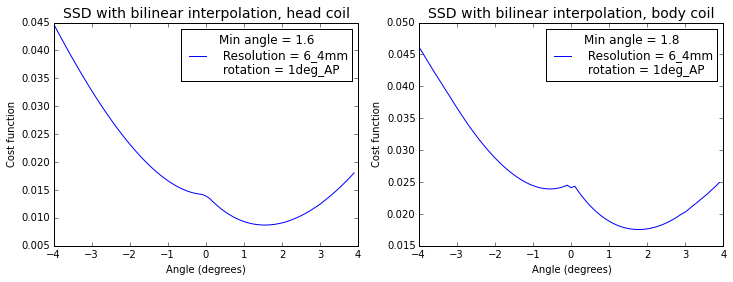

6_4mm head AP 5deg 3deg
6_4mm body AP 5deg 3deg


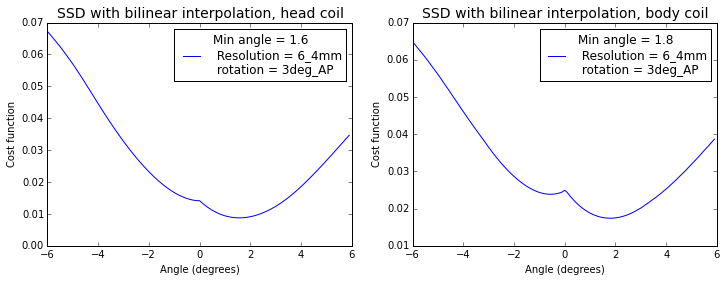

6_4mm head AP 7deg 5deg
6_4mm body AP 7deg 5deg


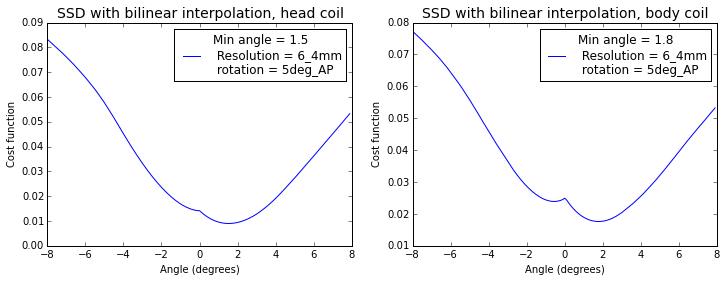

6_4mm head AP 9deg 7deg
6_4mm body AP 9deg 7deg


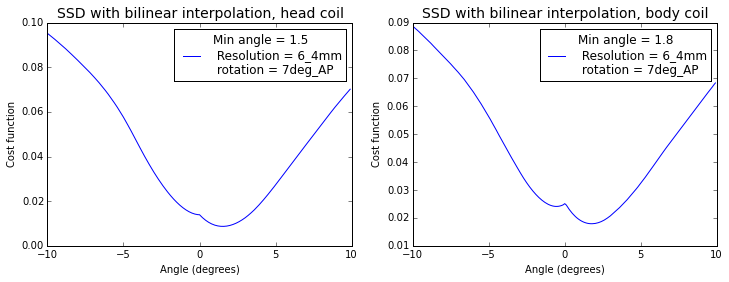

8mm head LR 3deg 1deg
8mm body LR 3deg 1deg


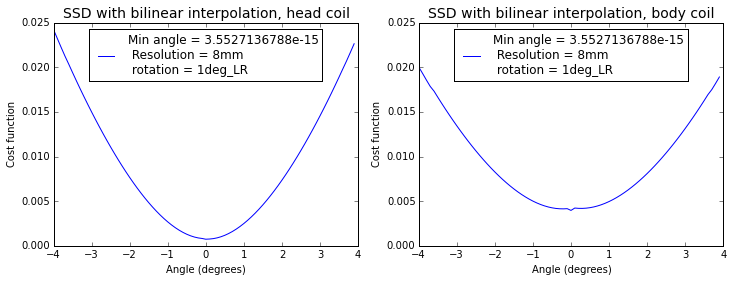

8mm head LR 5deg 3deg
8mm body LR 5deg 3deg


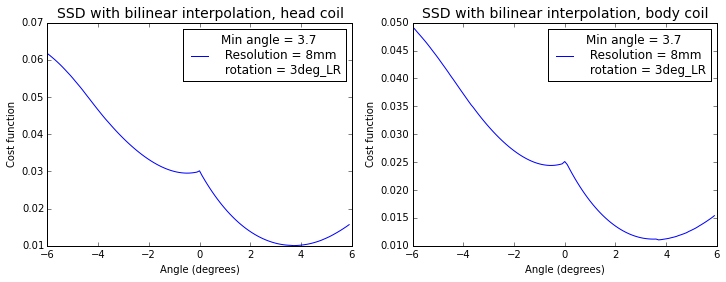

8mm head LR 7deg 5deg
8mm body LR 7deg 5deg


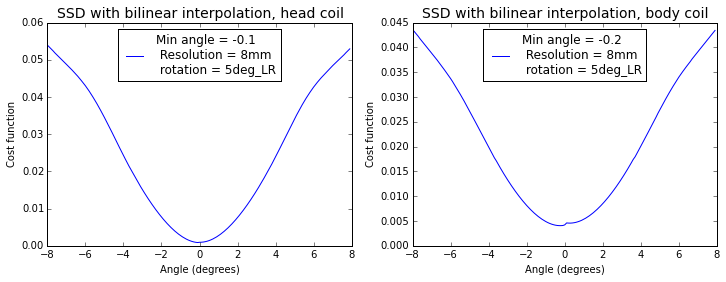

8mm head LR 9deg 7deg
8mm body LR 9deg 7deg


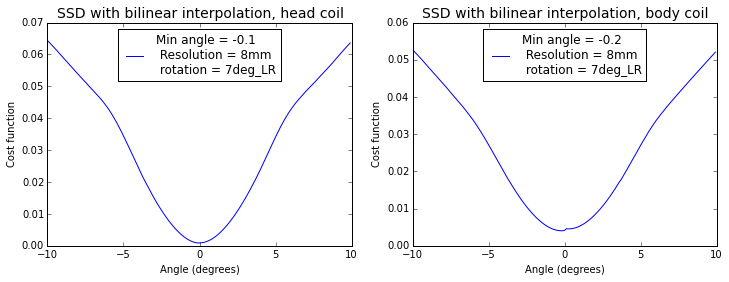

8mm head AP 3deg 1deg
8mm body AP 3deg 1deg


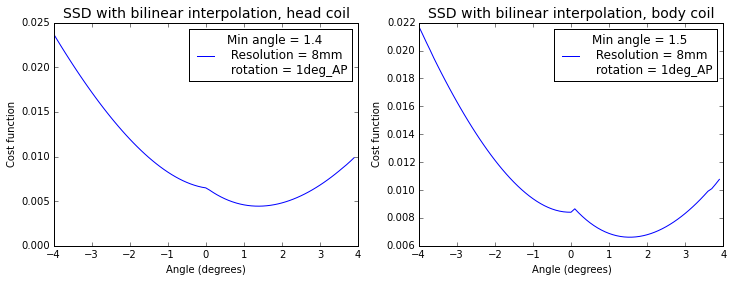

8mm head AP 5deg 3deg
8mm body AP 5deg 3deg


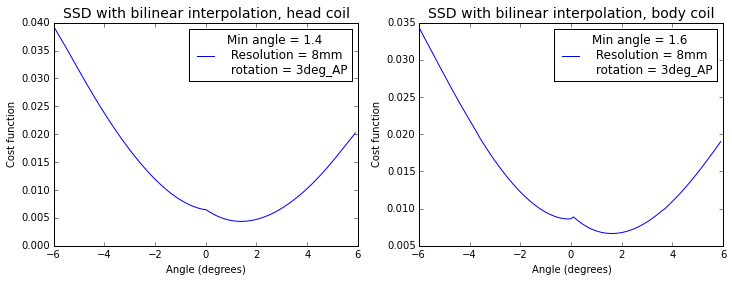

8mm head AP 7deg 5deg
8mm body AP 7deg 5deg


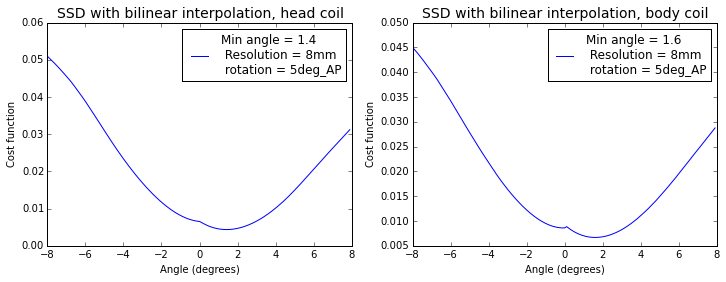

8mm head AP 9deg 7deg
8mm body AP 9deg 7deg


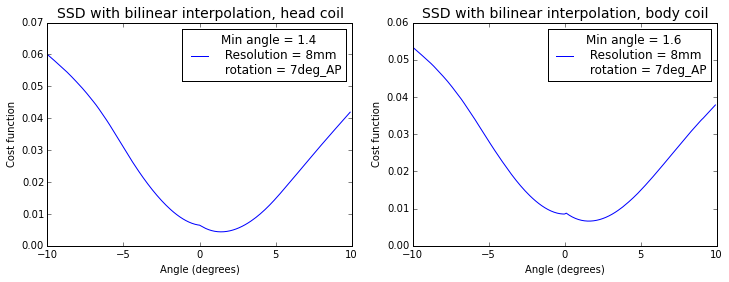

10mm head LR 3deg 1deg
10mm body LR 3deg 1deg


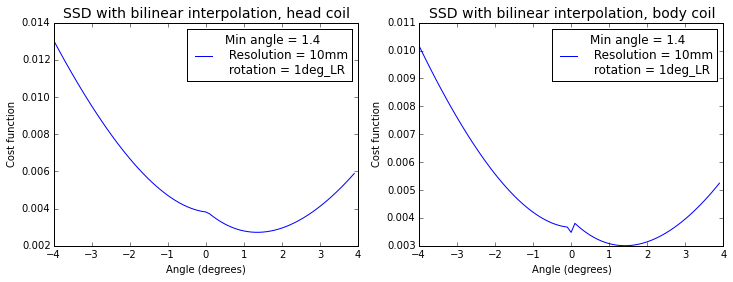

10mm head LR 5deg 3deg
10mm body LR 5deg 3deg


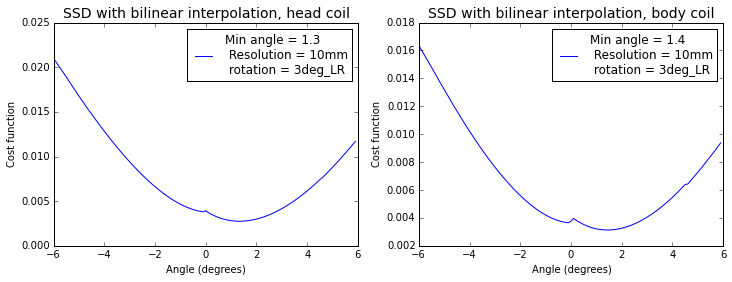

10mm head LR 7deg 5deg
10mm body LR 7deg 5deg


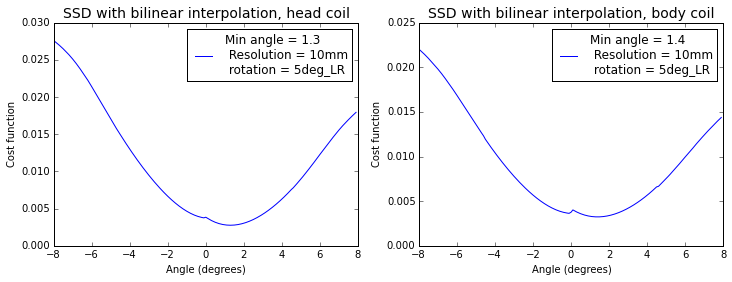

10mm head LR 9deg 7deg
10mm body LR 9deg 7deg


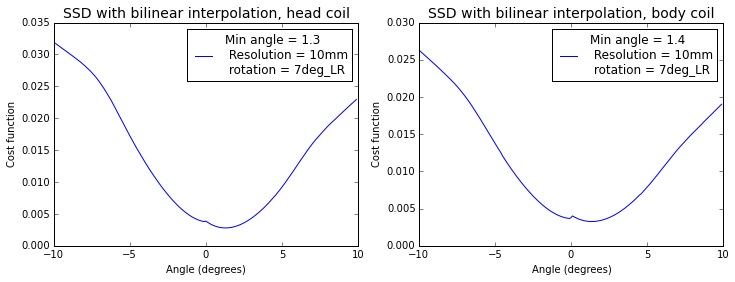

10mm head AP 3deg 1deg
10mm body AP 3deg 1deg


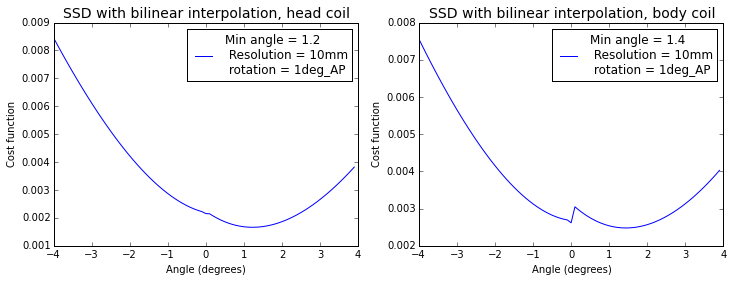

10mm head AP 5deg 3deg
10mm body AP 5deg 3deg


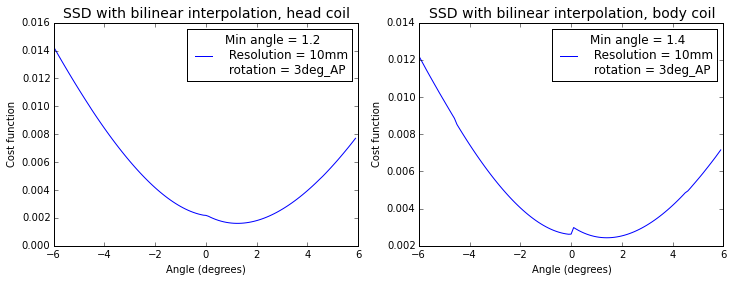

10mm head AP 7deg 5deg
10mm body AP 7deg 5deg


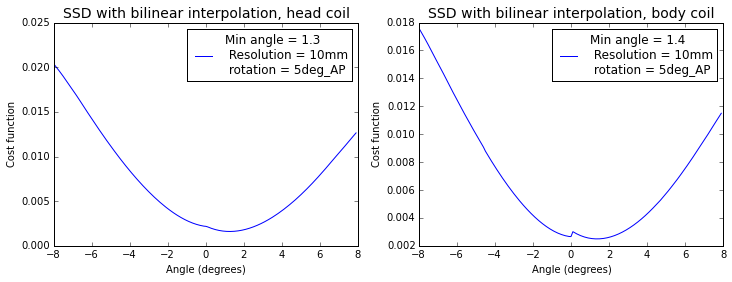

10mm head AP 9deg 7deg
10mm body AP 9deg 7deg


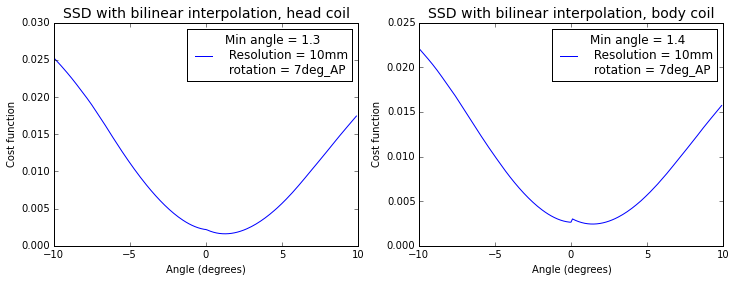

In [79]:
# cross registering revered
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    for rot in rot_axes:
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        for idx_deg, deg in enumerate(degrees[:-1]):
            plt.figure(figsize=[12,4])
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-3,d+3,0.1)
                print res,coil,rot,degrees[idx_deg+1],deg
                cost = rot_cost_func(data_dict[res][coil][rot][degrees[idx_deg+1]][0],data_dict[res][coil][rot][deg][0],thetas,axis=ax)
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, cost, res, 'bilinear',deg+'_'+rot, coil)
            plt.show()